## HOTEL BOOKING CANCELATION PREDICTION PROJECT

Data Science project for analyzing and visualizing hotel booking dataset and predicting booking status with Logistic 
Regression,KNN,Decision Tree and SVC.  
[Github link ](https://github.com/AslihanYoldas/ada-lovelace-final-project)

### Problem Definition And Purpose Of The Project

Traveling and accommodation have become integral parts of a rapidly growing industry. However, hotel reservation cancellations pose a significant challenge for the accommodation sector, creating uncertainty for businesses. The aim is to provide valuable insights to stakeholders in the industry by predicting the likelihood of customers canceling their reservations in advance.

There are various reasons why customers cancel hotel reservations. Rooms that remain vacant on any given day can lead to increased costs.

If hotels allow excessive reservations and more customers arrive than the total number of available rooms, hotels may incur additional costs to relocate customers to another affiliated hotel (resulting in decreased profit margins or a net loss) and may have received negative reviews from customers due to unfavorable experiences.

Businesses can benefit from predicting reservation cancellations in advance by managing their rooms more effectively, optimizing staff planning, and enhancing customer satisfaction.

### BUSINESS SOLUTION

A business strategy that hotel managements can implement is predicting reservation cancellations. They can use databases consisting of past reservation records, utilizing machine learning to determine the probability of cancellations. The machine learning model can analyze the characteristics and reservation details of different guests to predict the likelihood of cancellation.

This allows hotel management to better plan by allowing for excess reservations and, in the event of cancellations, proactively rearrange customers who were initially considered as excess reservations to relevant hotels, minimizing disappointment in customer experiences.

This strategy enables hotels to make emergency plans, providing them the opportunity to anticipate cancellation probabilities, optimize planning, and enhance overall customer satisfaction by minimizing disruptions caused by excess reservations

### Dataset

- Dataset contains 36k rows and 27 columns.
- Original Columns:
    - Booking_ID  *string - ID of the booking (unique)*
    - number_of_adults *int - number of adults*
    - number_of_children *int - number of children*
    - number_of_weekend_nights *int - number of weekend nights*
    - number_of_week_nights *int - number of week nights*
    - type_of_meal *category - meal type (Meal type 1, Meal Type 2, Meal Type 3, Not Selected)*
    - car_parking_space *int- car parking space (0,1)*
    - room_type *category - room type (Room Type 1, Room Type 2, Room Type 3, Room Type 4, Room Type 5, Room Type 6, Room Type 7)*
    - lead_time *int - number of days between the booking date and the arrival date*
    - market_segment_type *category - market segment type (Offline, Online, Corporate, Aviation, Complementary)*
    - repeated *int - Indicates whether the booking is a repeat booking (0,1)*
    - P_C *int - number of previous bookings that were canceled by the customer prior to the current booking*
    - P_not_C *int - number of previous bookings not canceled by the customer prior to the current booking*
    - average_price *float - average price of the booking*
    - special_requests *int - number of the special request*
    - date_of_reservation *datetime - Date of the booking*
    - booking_status *str- booking status (Canceled, Not Canceled)*
- New columns : This columns created by using existing columns 
    - reservation_day *int - day of the reservation (1-31)*
    - reservation_month *int - month of the reservation (1-12)*
    - reservation_year *int - year of the reservation (2015-2018)*
    - date_of_arrival *datetime - date of the arrival* 
    - arrival_day *int - day of the arrival (1-31)*
    - arrival_month *int - month of the arrival (1-12)*
    - arrival_year *int - year of the arrival (2016-2020)*
    - lead_month *int - number of months between the booking date and the arrival date*
    - number_of_total_nights *int - sum of week and weekend nights*
    - number_of_total_people *int - sum of adult and children*
    
    
## Results
### F1 Score Table

| Model       | Cancelled   | Not Canceled |
| ----------- | ----------- | ----------
| Logistic Regression| 0.66| 0.85
| KNN   | 0.75  | 0.89
| Decision Tree   | 0.77 | 0.88
| SVC   | 0.68 | 0.87

- Not canceled class prediction is better than cancelled. It is most likely because of imbalance of classes. 
- Best canceled  prediction made with decision tree at %77 
- Best not canceled prediction made with knn at %89
- KNN and Decision Tree are the best resulted models.

In [1]:
####################################
# Importing Libraries
####################################
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import isnan
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.option_context('mode.use_inf_as_na', True)

### Functions

In [2]:
####################################################
# Data pre-processing functions
####################################################
def df_turn_datatype_to_categorical(df,column_names):
    """
    In a dataframe turns the given columns' data types to categorical.

    :param df: dataframe 
    :param column_names: list- column names 
  
    :return df:dataframe -Returns the dataframe after changing data types to categorical for given column names
    """
    for column_name in column_names:
        df[column_name] = df[column_name].astype('category')
    return df 

def encode_categorical_variable(categorical_data):
    """
    Encoding categorical data to numerical data

    :param categorical_data dataframe - dataframe that contains categorical one column 
    :return numpy array - Categorical data turn into numerical data
    """
    le = LabelEncoder()
    train = categorical_data.unique()
    return le.fit(train).transform(categorical_data)

def normalize_data(df, dropped_columns):
    """
    Normalizing the given dataframe except for dropped columns

    :param df dataframe - dataframe to be normalized
    :param dropped_columns list - column names that is not be normalized
    :return df_normalized dataframe - Normalized data frame 
    """

    scaler = StandardScaler()
    scaler.fit(df.drop(dropped_columns, axis=1))
    scaled_features = scaler.transform(df.drop(dropped_columns,axis=1))
    df_normalized= pd.DataFrame(scaled_features,columns=df.drop(dropped_columns,axis=1).columns)
    return df_normalized



In [3]:
################################################
# Data Viz Functions
################################################
def plot_hist(df, title, xlabel, column_name, bin_num, kde, hue=None):
    """
    Plots histogram for the given dataframe's column.

    :param df: dataframe
    :param title: str - Title of the plot
    :param xlabel: str - Label of the x-axis
    :param column_name: str - x axis data's column name
    :param bin-num: int - Number of the bins
    :param kde: bool - Drawing the line 
    :param hue: str - Grouping variable column name
    
    :return : shows the plot"""
    
    plt.figure(figsize=(15,8))
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel(xlabel)
    sns.histplot(data = df, x = column_name, bins = bin_num,  kde = kde, hue=hue,
                 multiple="stack",
                palette="deep",
                edgecolor=".3",
                linewidth=.5,
     )
    plt.show()
    
    
    
def plot_count(data, title, xlabel,color=None,hue=None,palette=None):
    """Plots count plot for the given dataframe's column.

    :param data: dataframe that contains one column
    :param title: str - title of the plot
    :param xlabel: str - label of the x-axis
    :param hue: str - grouping variable column name
    :param color: string - color of the plot 
    :param palette: string - palette of the plot when using hue

    :return : shows the plot"""
    plt.figure(figsize=(15,8))
    plt.title(title)
    plt.xlabel(xlabel)
    sns.countplot(x=data,color=color,hue=hue, palette=palette,orient='v')
    plt.show()

def plot_bar(df, colmn_name_x, colmn_name_y, title, xlabel, ylabel, color, orient='v'):
    """
    Plots bar plot for the given data.

    :param df: dataframe
    :param column_name_x: str - x axis data's column name
    :param column_name_y: str - y axis data's column name
    :param title: str - Title of the plot
    :param xlabel: str - Label of the x-axis
    :param ylabel: str - Label of the y-axis
    :param color: string - color of the plot 
    :param orien: string - Orientation of the plot (orient ='v')

    :return : shows the plot"""
    plt.figure(figsize=(15,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    sns.barplot(data=df,
                x=colmn_name_x,
                y=colmn_name_y,
                color=color,
                orient = orient
                )
    plt.show()

def corr_heatmap(df):
    """
    Calculates correllation for given dataframe and plot it as a heatmap

    :param df: dataframe 
  
    :return :shows the plot
    """
    
    matrix = df.corr()
    plt.figure(figsize=(15,8))
    sns.heatmap(matrix, 
            xticklabels=matrix.columns.values,
            yticklabels=matrix.columns.values,
            cmap=sns.diverging_palette(20, 220, n=200),
            vmin=-1,
            vmax=1,
            square=True
    )
    plt.show()

In [4]:
################################################
# Outlier Functions
################################################
def outlier_thresholds(df, col_name, p1=0.1, p2=0.9):
    """
    In a dataframe finds the given column's thresholds for outliers with given percentiles.
    The low limit is the first percentile (p1)  minus 1.5 times the range. 
    The high limit is the second percentile (p2) sum 1.5 times the range. 

    :param df: dataframe 
    :param col_name: str- column name
    :param p1: float- first percentile (p1= 0.1)
    :param p2: float- second percentile (p2= 0.9)
  
    :return low_limit, up_limit:float,float -Returns the low threshold and high treshold for outliers
    """
    percentile1 = df[col_name].quantile(p1)
    percentile2 = df[col_name].quantile(p2)
    interpercentile_range = percentile2 - percentile1
    up_limit = percentile2 + 1.5 * interpercentile_range
    low_limit = percentile1 - 1.5 * interpercentile_range
    return low_limit, up_limit 


def check_outlier(df, col_name):
    """
    Checks if for given dataframe column has outlier using outlier_threshold() function

    :param df: dataframe 
    :param col_name: str- column name

    :return bool -Returns true if there is outliers otherwise it returns false
    """
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if ((df[col_name] > up_limit) | (df[col_name] < low_limit)).any():
        return True
    else:
        return False # To check if variables have outliers.
    
# If outliers exists get the outliers
# Getting the outliers tresholds and finding the data exceeding thresholds
def get_outlier(df,col_name):
    """
    If outliers exists get the outliers using outlier_threshold() and check_outlier() functions.

    :param df: dataframe 
    :param col_name: str- column name

    :return dataframe or string -Returns the outliers' rows in the dataframe if outliers exist
      otherwise it returns "no outlier found" string
    """
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if check_outlier(df,col_name):
        return df[(df[col_name] > up_limit) | (df[col_name] < low_limit)]
    else:
        return 'No outlier found'


## Replacing Outliers Functions
def replace_average_price_outlier_with_median_of_similar_rows(df,col_name='average_price'):
    """
    In average price column get the outliers and replace them. The new value found by getting
    similar rows to the outlier and calculating median of that rows' average prices.

    :param df: dataframe 
    :param col_name: str- column name =  average_price

    :return str - Returns confirmation text  """
    # Getting the upper limit
    threshold = outlier_thresholds(df, col_name)[1]
    try:
        # Getting the outliers indexes
        outlier_index = get_outlier(df, col_name).index
    except TypeError:
        # If outlier not exist
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        number_of_week_nights=df.loc[index,'number_of_week_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_week_nights == @number_of_week_nights & \
                            number_of_children == @number_of_children & \
                            number_of_weekend_nights == @number_of_weekend_nights & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            average_price < @threshold')[col_name].median()
        # If not similar rows found
        if isnan(new_value):
            new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_week_nights == @number_of_week_nights & \
                            number_of_weekend_nights == @number_of_weekend_nights & \
                            type_of_meal == @type_of_meal  & \
                            average_price < @threshold')[col_name].median()
        # Replace the outlier
        df.loc[index,col_name]=new_value
    return 'Outliers filled with similar rows median value'

def replace_number_of_children_outlier_with_median_of_similar_rows(df, threshold, col_name='number_of_children'):
    """
    In number_of_children column get the outliers and replace them. The new value found by getting
    similar rows to the outlier and calculating median of that rows' number of children.

    :param df: dataframe 
    :param threshold: int - Outlier upper limit
    :param col_name: str- column name =  number_of_children

    :return str - Returns confirmation text  """
    try:
        # Getting the outliers indexes
        outlier_index = df[(df[col_name] > threshold)].index
    except TypeError:
        # If outlier not exist
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        average_price=df.loc[index,'average_price']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                             type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            average_price ==@average_price  & \
                            number_of_children < @threshold')[col_name].median()

        # Replace the outlier
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

def replace_number_of_weekend_nights_outlier_with_median_of_similar_rows(df,col_name='number_of_weekend_nights'):
    """
    In number_of_weekend_nights column get the outliers and replace them. The new value found by getting
    similar rows to the outlier and calculating median of that rows' number of weekend nights.

    :param df: dataframe 
    :param col_name: str- column name =  number_of_weekend_nights

    :return str - Returns confirmation text  """
    # Getting the upper limit
    threshold = outlier_thresholds(df, col_name)[1]
    try:
        # Getting the outliers indexes
        outlier_index = get_outlier(df, col_name).index
    except TypeError:
        # If outlier not exist
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_children == @number_of_children & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            number_of_weekend_nights < @threshold')[col_name].median()
        # Replace the outlier
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

def replace_number_of_week_nights_outlier_with_median_of_similar_rows(df, threshold, col_name='number_of_week_nights'):

    """In number_of_week_nights column get the outliers and replace them. The new value found by getting
    similar rows to the outlier and calculating median of that rows' number of week nights.

    :param df: dataframe 
    :param threshold: int - Outlier upper limit
    :param col_name: str- column name =  number_of_week_nights

    :return str - Returns confirmation text  """
    try:
        # Getting the outliers indexes
        outlier_index = df[(df[col_name] > threshold)].index
    except TypeError:
        # If outlier not exist
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        average_price=df.loc[index,'average_price']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_children == @number_of_children & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            number_of_weekend_nights < @threshold')[col_name].median()
        # Replace the outlier
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

def replace_P_C_outlier_with_median_of_similar_rows(df, threshold, col_name='P_C'):
    """In P_C column get the outliers and replace them. The new value found by getting
    similar rows to the outlier and calculating median of that rows' P_C values.

    :param df: dataframe 
    :param threshold: int - Outlier upper limit
    :param col_name: str- column name = P_C

    :return str - Returns confirmation text  """
    
    try:
        # Getting the outliers indexes
        outlier_index = df[(df[col_name] > threshold)].index
    except TypeError:
        # If outlier not exist
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        number_of_week_nights=df.loc[index,'number_of_week_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        average_price=df.loc[index,'average_price']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_children == @number_of_children & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            P_C < @threshold')[col_name].median()
        # Replace the outliers
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

def replace_P_not_C_outlier_with_median_of_similar_rows(df, threshold, col_name='P_not_C'):
    """In P_not_C column get the outliers and replace them. The new value found by getting
    similar rows to the outlier and calculating median of that rows' P_not_C values.

    :param df: dataframe 
    :param threshold: int - Outlier upper limit
    :param col_name: str- column name = P_not_C

    :return str - Returns confirmation text  """
    try:
        # Getting the outliers indexes
        outlier_index = df[(df[col_name] > threshold)].index
    except TypeError:
        # If outlier not exist
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        number_of_week_nights=df.loc[index,'number_of_week_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        average_price=df.loc[index,'average_price']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_children == @number_of_children & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            average_price ==@average_price  & \
                            P_C < @threshold')[col_name].median()
        # Replace the outliers
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

In [5]:
################################################
# Feature Selection Functions
################################################
def feauture_selection_select_k_best(df, k, X, y):
    """
    Select feautures with k_best and f_classif score function

    :param df dataframe - dataframe to select feautures
    :param k int - number of features to be selected
    :param X MatrixLike - data features
    :param y MatrixLike - data targets
    :return dataframe, dataframe df_feauture_k_best_score, df_feautures_k_best-
     Dataframe of features and their scores and for given df dataframe of selected features
    """

    k_best = SelectKBest(k=k, score_func=f_classif)
    k_best.fit_transform(X, y)
    # Get the indices of the selected features
    selected_features_indices = k_best.get_support(indices=True)
    # Get the scores associated with each feature
    feature_scores_k_best = k_best.scores_
    # Create a list of tuples containing feature names and scores
    feature_info = list(zip(X.columns, feature_scores_k_best))
    # Sort the feature info in descending order based on scores
    sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
    # get feautre names and score
    feature_names, feature_scores = zip(*sorted_feature_info[:])
    # Turn into a dataframe 
    df_feauture_k_best_score = pd.DataFrame({'feature_name':feature_names,'feature_score':feature_scores})
    # Get the selected features data from the dataframe
    df_feautures_k_best =df.iloc[:, selected_features_indices]

    return df_feauture_k_best_score, df_feautures_k_best

def feature_selection_extra_trees_classifier(df, X, y):
    """
    Select feautures with ExtraTreesClassifier

    :param df dataframe - dataframe to select feautures
    :param X MatrixLike - data features
    :param y MatrixLike - data targets
    :return dataframe, dataframe df_extra_tree_class_feature_score, df_feautures_extra_tree_class -
     Dataframe of features and their scores and for given df dataframe of selected features
    """
    model = ExtraTreesClassifier()
    # fit the model
    model.fit(X, y)
    # summarize feature importance
    feature_info = list(zip(X.columns, model.feature_importances_))
    # sort the feature info in descending order based on scores
    sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
    # get feautre names and score
    feature_names, feature_scores = zip(*sorted_feature_info[:])
    # turn into a dataframe
    df_extra_tree_class_feature_score = pd.DataFrame({'feature_name':feature_names,'feature_score':feature_scores})
    # select the feauters with high score
    extra_tree_class_selected_features = df_extra_tree_class_feature_score.query( 'feature_score > 0.05')['feature_name']
    # Get the selected features data from the dataframe
    df_feautures_extra_tree_class =df.loc[:, extra_tree_class_selected_features]
    return df_extra_tree_class_feature_score,df_feautures_extra_tree_class

def feauture_selection_logistic_regression(df, X, y):
    """
    Select feautures with Logistic Regression coefficents

    :param df dataframe - dataframe to select feautures
    :param X MatrixLike - data features
    :param y MatrixLike - data targets
    :return dataframe, dataframe df_logistic_feature_score,df_feautures_logistic -
     Dataframe of features and their scores and for given df dataframe of selected features
    """
    model = LogisticRegression()
    # fit the model
    model.fit(X, y)
    # get coefficents
    feature_scores_logistic = model.coef_[0]
    # summarize feature importance
    feature_info = list(zip(X.columns, feature_scores_logistic))
    # sort the feature info in descending order based on scores
    sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
    # get feautre names and score
    feature_names, feature_scores = zip(*sorted_feature_info[:])
    # turn into a dataframe 
    df_logistic_feature_score = pd.DataFrame({'feature_name':feature_names,'feature_score':feature_scores})
    # select the feauters with high score
    logistic_regression_selected_features = df_logistic_feature_score.query( 'feature_score > 0.50 | feature_score < -0.50')['feature_name']
    # get the selected features data from the dataframe
    df_feautures_logistic =df.loc[:, logistic_regression_selected_features]
    return df_logistic_feature_score,df_feautures_logistic

# decision tree for feature importance on a classifier problem
def feature_selection_dt(df, X, y):
    """
    Select feautures with Decision Tree feature importance scores

    :param df dataframe - dataframe to select feautures
    :param X MatrixLike - data features
    :param y MatrixLike - data targets
    :return dataframe, dataframe df_dt_feature_score, df_feautures_dt -
     Dataframe of features and their scores and for given df dataframe of selected features
"""
    model = DecisionTreeClassifier()
    # fit the model
    model.fit(X, y)
    # get importance
    feature_scores_dt = model.feature_importances_
    # summarize feature importance
    feature_info = list(zip(X.columns, feature_scores_dt))
    # sort the feature info in descending order based on scores
    sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
    # get feautre names and score
    feature_names, feature_scores = zip(*sorted_feature_info[:])
    # turn into a dataframe
    df_dt_feature_score = pd.DataFrame({'feature_name':feature_names,'feature_score':feature_scores})
    # select the feauters with high score
    dt_selected_features = df_dt_feature_score.query( 'feature_score > 0.05 | feature_score < -0.05')['feature_name']
    # get the selected features data from the dataframe
    df_feautures_dt =df.loc[:, dt_selected_features]

    return df_dt_feature_score,df_feautures_dt


In [6]:
################################################
# Modelling Functions
################################################
def train_model_and_predict(model,X_train,y_train,X_test):
    """
    Training the given model with given train data and predicting test data returning the predictions

    :param model Any - The model (Logistic regression , knn classifiier etc.)
    :param X_train numpy array - Train data features
    :param y_train numpy array - Train data targets
    :param X_test numpy array - Test data features
    :return y_pred numpy array - Test data predictions
    """

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def evaluate_model(model, X_test, y_test, y_pred, title, display_labels=['Canceled','Not Canceled']):
    """
    Getting the normalize and not normalized confusion matrix  and printing the classification report for given model and data

    :param model Any - The model (Logistic regression , knn classifiier etc.)
    :param X_train numpy array - Train data features
    :param y_train numpy array - Train data targets
    :param y_test numpy array - Test data targets
    :param y_pred numpy array - Test data predictions
    :param display_labels list - The labels of the targets

    :return - shows the plot and print classification report

    """
    titles_options = [
    (title+" confusion matrix, without normalization", None),
    (title+" normalized confusion matrix", "true"),]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            model,
            X_test,
            y_test,
            display_labels=display_labels,
            cmap=plt.cm.Greens,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(title + '\n' + classification_report(y_test,y_pred,labels=[0,1]))

In [7]:
# Load Dataset
df = pd.read_csv('/kaggle/input/hotel-booking-cancellation-prediction/booking.csv')


## Understanding The Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [9]:
df.sample(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
20698,INN20699,2,0,0,1,Meal Plan 1,0,Room_Type 1,14,Online,0,0,0,87.00,1,11/4/2017,Canceled
24939,INN24940,2,0,2,1,Meal Plan 1,0,Room_Type 1,28,Online,0,0,0,97.63,1,4/17/2018,Canceled
20037,INN20038,3,0,0,3,Meal Plan 1,0,Room_Type 4,50,Online,0,0,0,150.30,0,6/29/2018,Canceled
4815,INN04816,0,2,0,2,Meal Plan 1,0,Room_Type 2,195,Online,0,0,0,71.22,0,12/2/2018,Canceled
14684,INN14685,2,0,0,2,Meal Plan 1,0,Room_Type 1,29,Corporate,0,0,0,85.00,0,12/2/2018,Not_Canceled


In [10]:
# Data statistical values
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [11]:
# No null values
print(df.isnull().sum().sort_values(ascending=False))

Booking_ID                  0
market segment type         0
date of reservation         0
special requests            0
average price               0
P-not-C                     0
P-C                         0
repeated                    0
lead time                   0
number of adults            0
room type                   0
car parking space           0
type of meal                0
number of week nights       0
number of weekend nights    0
number of children          0
booking status              0
dtype: int64


In [12]:
## Unique values
pd.Series({c: df[c].unique() for c in df[['number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'special requests',
       'booking status']]}) 

number of adults                                              [1, 2, 3, 0, 4]
number of children                                        [1, 0, 2, 3, 10, 9]
number of weekend nights                             [2, 1, 0, 4, 3, 6, 5, 7]
number of week nights       [5, 3, 2, 4, 0, 1, 10, 6, 11, 7, 15, 9, 13, 8,...
type of meal                [Meal Plan 1, Not Selected, Meal Plan 2, Meal ...
car parking space                                                      [0, 1]
room type                   [Room_Type 1, Room_Type 4, Room_Type 2, Room_T...
market segment type         [Offline, Online, Corporate, Aviation, Complem...
repeated                                                               [0, 1]
P-C                                             [0, 3, 1, 2, 11, 4, 5, 13, 6]
P-not-C                     [0, 5, 1, 3, 4, 12, 19, 2, 15, 17, 7, 20, 16, ...
special requests                                           [0, 1, 3, 2, 4, 5]
booking status                                       [Not_Cancel

In [13]:
## Classes are imbalanced
df["booking status"].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

## Data Pre-Processing

In [14]:
#Change column names
df.columns = [name.replace(' ','_') for name in df.columns]
df = df.rename(columns={'P-C': 'P_C', 'P-not-C': 'P_not_C'})

In [15]:
# Change datatypes 
#categorical
df = df_turn_datatype_to_categorical(df,['type_of_meal', 'room_type', 'market_segment_type', 'booking_status' ])
#datetime
# In 2018 Feb doesn't have 29 days
# Moving the data that have booking date 2/29/2018 to the previous day and changing the format
df.date_of_reservation = df.date_of_reservation.str.replace('2018-2-29', '2/28/2018')
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], format='%m/%d/%Y')

### Handle Outliers

Text(0.5, 1.0, 'Detecting Outliers with Boxplots')

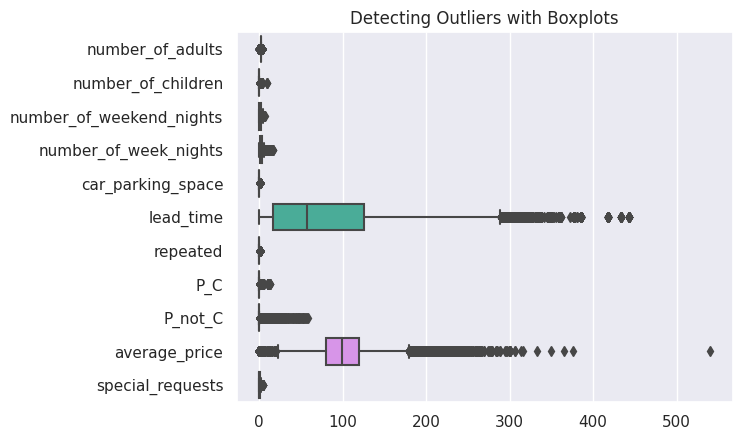

In [16]:
## Looking at boxplots the find the outliers
sns.set_theme(style="darkgrid")
sns.boxplot( data=df,orient='h')
plt.title('Detecting Outliers with Boxplots')

In [17]:
num_cols =['number_of_adults', 'number_of_children',
          'number_of_weekend_nights', 'number_of_week_nights', 
            'lead_time', 'P_C', 'P_not_C', 'average_price']
# Checking the columns that has outliers
for col in num_cols:
    print(f"{col} : {check_outlier(df, col)}")

number_of_adults : True
number_of_children : True
number_of_weekend_nights : True
number_of_week_nights : True
lead_time : False
P_C : True
P_not_C : True
average_price : True


### Average Price

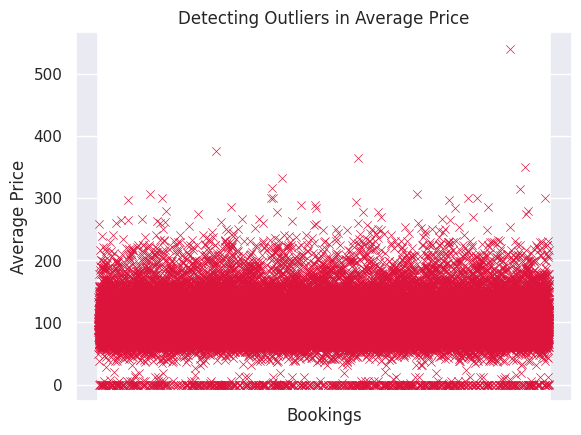

In [18]:
# Scatter plot for average price to see outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="average_price",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Average Price')
plt.title('Detecting Outliers in Average Price')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)


In [19]:
# Avarage price outliers statistic values
# There are 33 outliers between 269-540
get_outlier(df,'average_price')['average_price'].describe()

count     33.000000
mean     305.610303
std       49.172390
min      269.300000
25%      279.200000
50%      296.000000
75%      306.000000
max      540.000000
Name: average_price, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_price', ylabel='Count'>

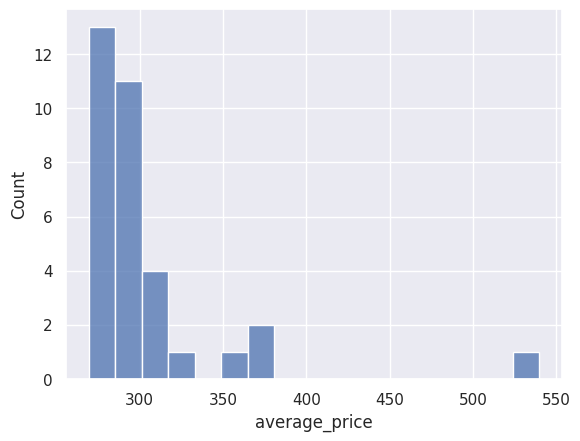

In [20]:
# Plotting outliers
sns.histplot(get_outlier(df,'average_price')['average_price'])

In [21]:
# Replace the outliers
replace_average_price_outlier_with_median_of_similar_rows(df,'average_price')


'Outliers filled with similar rows median value'

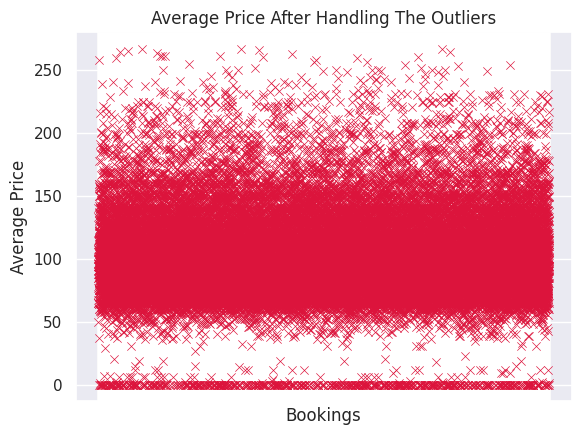

In [22]:
# Scatter plot for average price to after handling outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="average_price",
                marker="x",
                color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Average Price')
plt.title('Average Price After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)


### Number of Children

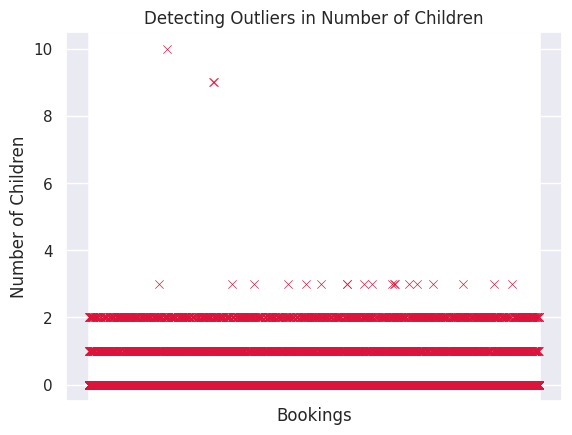

In [23]:
# Scatter plot for number of children to see outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_children",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Children')
plt.title('Detecting Outliers in Number of Children')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [24]:
# number of children outliers statistic values
get_outlier(df,'number_of_children')['number_of_children'].describe()

count    2702.000000
mean        1.414878
std         0.570119
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: number_of_children, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_children', ylabel='Count'>

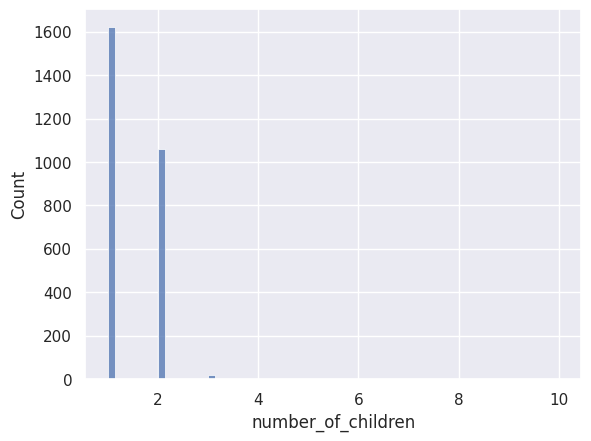

In [25]:
# Plotting outliers
sns.histplot(get_outlier(df,'number_of_children')['number_of_children'])

In [26]:
# In this plot it doesn't make sense to change number of children
# because it effects other variables 
# because of most of the data number of children is 0 
# it doesn't mean one children or two children is outliers 
# but having more than 8 children could be outliers 
df.query('number_of_children > 8')

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P_C,P_not_C,average_price,special_requests,date_of_reservation,booking_status
6338,INN06339,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,Online,0,0,0,84.45,1,2018-01-12,Not_Canceled
10041,INN10042,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,Corporate,0,0,0,95.00,0,2017-10-11,Not_Canceled
10061,INN10062,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,Online,0,0,0,76.50,1,2017-08-13,Canceled


In [27]:
# Replace the outliers
replace_number_of_children_outlier_with_median_of_similar_rows(df, 8)

'Outliers filled with similar rows median value'

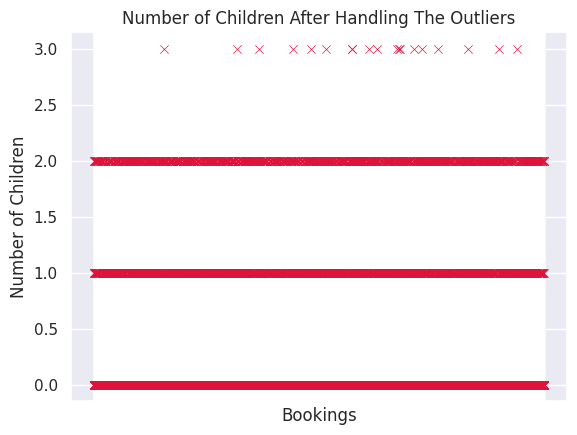

In [28]:
# Scatter plot for number of children to after handling outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_children",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Children')
plt.title('Number of Children After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

### Number of Adults

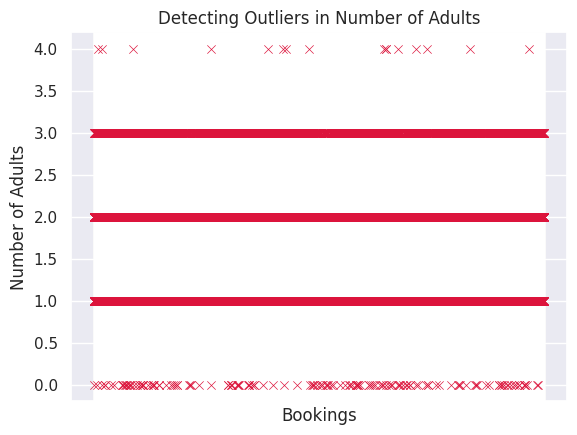

In [29]:
# Scatter plot for number of adults to see outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_adults",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Adults')
plt.title('Detecting Outliers in Number of Adults')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [30]:
# number of adults outliers statistic values
# When adult number is 4 detected as an outliers
get_outlier(df,'number_of_adults')['number_of_adults'].describe()

count    16.0
mean      4.0
std       0.0
min       4.0
25%       4.0
50%       4.0
75%       4.0
max       4.0
Name: number_of_adults, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 4.0)

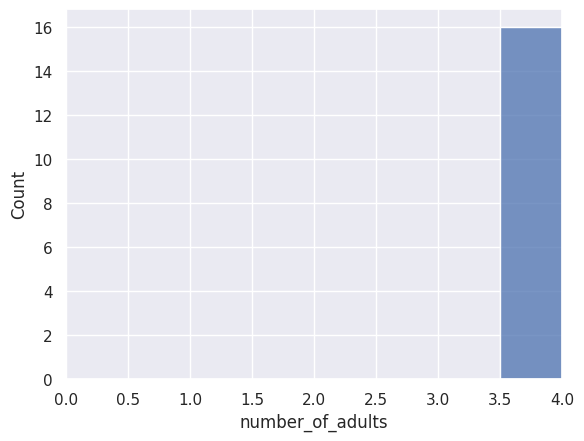

In [31]:
# Plotting outliers
# Same with number of children, number of adult is 4 not counted as a outlier
sns.histplot(get_outlier(df,'number_of_adults')['number_of_adults'])
plt.xlim(0,4)

### Number of Weekend Nights

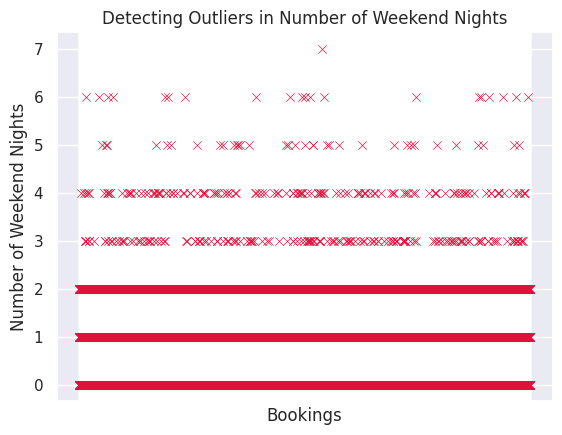

In [32]:
# Scatter plot for number of weekend nights to see outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_weekend_nights",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Weekend Nights')
plt.title('Detecting Outliers in Number of Weekend Nights')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [33]:
# number_of_weekend_nights outliers statistic values
# There are 21 outliers between 6 and 7
get_outlier(df,'number_of_weekend_nights')['number_of_weekend_nights'].describe()

count    21.000000
mean      6.047619
std       0.218218
min       6.000000
25%       6.000000
50%       6.000000
75%       6.000000
max       7.000000
Name: number_of_weekend_nights, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_weekend_nights', ylabel='Count'>

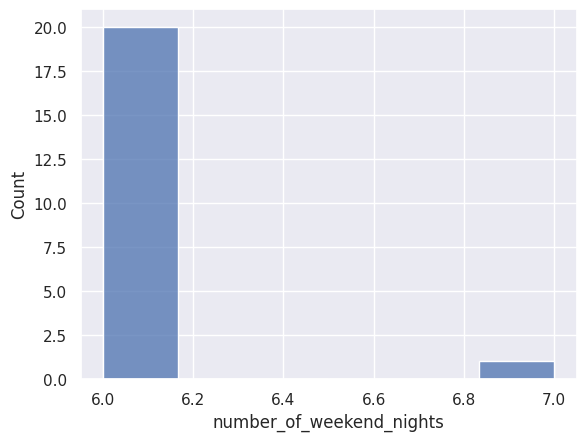

In [34]:
# Plotting outliers
sns.histplot(get_outlier(df,'number_of_weekend_nights')['number_of_weekend_nights'])

In [35]:
# Replace the outliers
replace_number_of_weekend_nights_outlier_with_median_of_similar_rows(df)

'Outliers filled with similar rows median value'

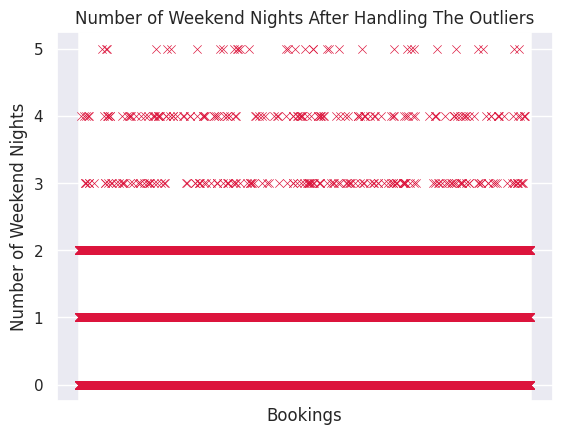

In [36]:
# Scatter plot for number of weekend nights to after handling outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_weekend_nights",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Weekend Nights')
plt.title('Number of Weekend Nights After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

### Number of Week Nights

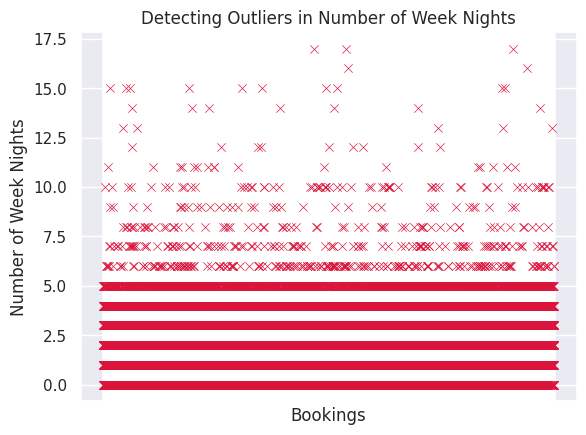

In [37]:
# Scatter plot for number of week nights to see outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_week_nights",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Week Nights')
plt.title('Detecting Outliers in Number of Week Nights')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [38]:
# number_of_weekend_nights outliers statistic values
# There are 149 outliers between 9 and 17
get_outlier(df,'number_of_week_nights')['number_of_week_nights'].describe()

count    149.000000
mean      10.852349
std        2.021425
min        9.000000
25%       10.000000
50%       10.000000
75%       11.000000
max       17.000000
Name: number_of_week_nights, dtype: float64

In [39]:
# From the plot we can see after 11 data lessen.
# Threshold determined as 11
# number_of_week_nights outliers statistic values determined by the threshold
df.query('number_of_week_nights >11')['number_of_week_nights'].describe()

count    36.000000
mean     14.000000
std       1.567528
min      12.000000
25%      12.750000
50%      14.000000
75%      15.000000
max      17.000000
Name: number_of_week_nights, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_week_nights', ylabel='Count'>

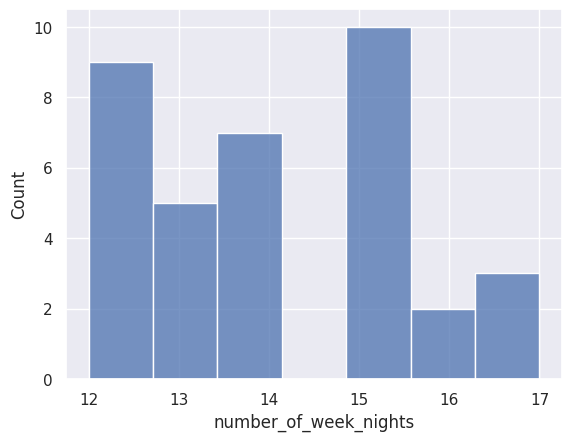

In [40]:
# Plotting outliers
sns.histplot(df.query('number_of_week_nights >11')['number_of_week_nights'])

In [41]:
# Replace the outliers
replace_number_of_week_nights_outlier_with_median_of_similar_rows(df,11)

'Outliers filled with similar rows median value'

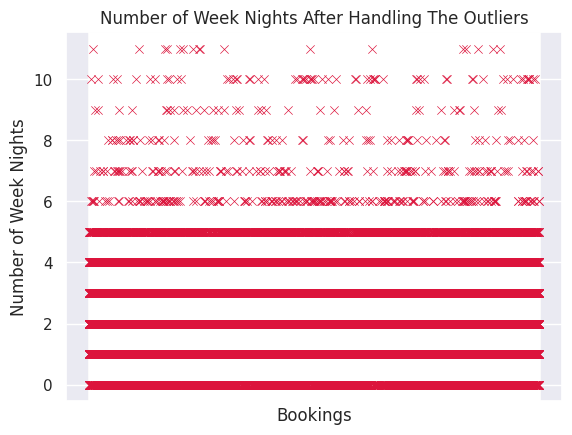

In [42]:
# Scatter plot for number of week nights to after handling outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_week_nights",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Week Nights')
plt.title('Number of Week Nights After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

### P-C

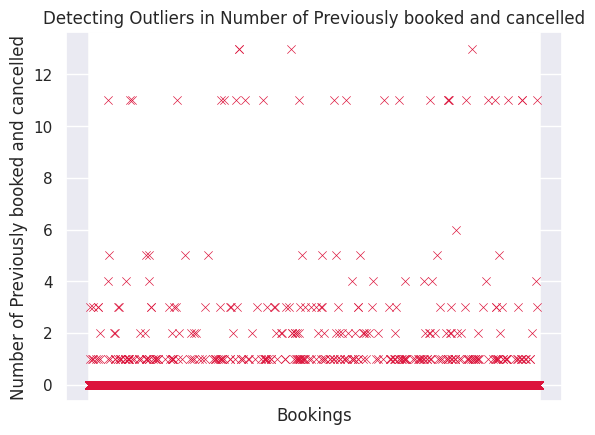

In [43]:
# Scatter plot for number of previously booked and cancelled nights to see outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="P_C",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and cancelled')
plt.title('Detecting Outliers in Number of Previously booked and cancelled')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [44]:
# P-C outliers statistic values
get_outlier(df,'P_C')['P_C'].describe()

count    338.000000
mean       2.505917
std        2.891966
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       13.000000
Name: P_C, dtype: float64

In [45]:
# From the plot we can see after 10 data lessen. 
# Threshold determined as 10
# P-C outliers statistic values determined by the threshold
df[df['P_C']>10]['P_C'].describe()


count    29.000000
mean     11.275862
std       0.701862
min      11.000000
25%      11.000000
50%      11.000000
75%      11.000000
max      13.000000
Name: P_C, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P_C', ylabel='Count'>

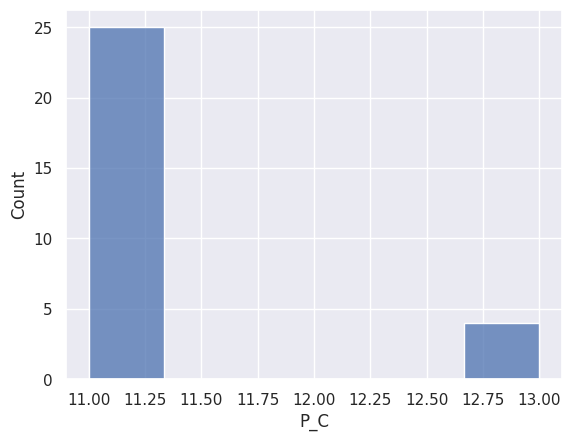

In [46]:
# Plotting outliers
sns.histplot(df[df['P_C']>10]['P_C'])

In [47]:
# Replace the outliers
replace_P_C_outlier_with_median_of_similar_rows(df,10)

'Outliers filled with similar rows median value'

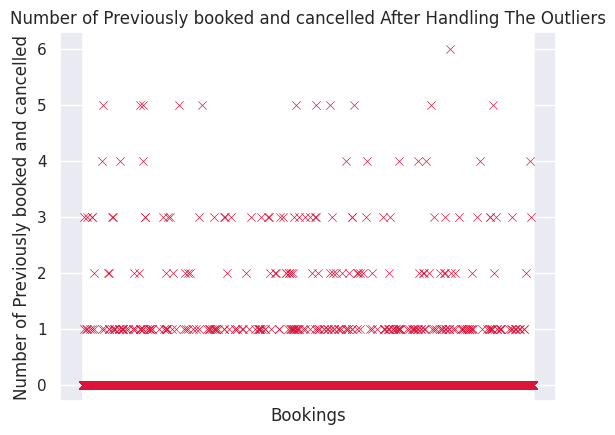

In [48]:
# Scatter plot for P-C to after handling outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="P_C",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and cancelled')
plt.title('Number of Previously booked and cancelled After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

### P-not-C

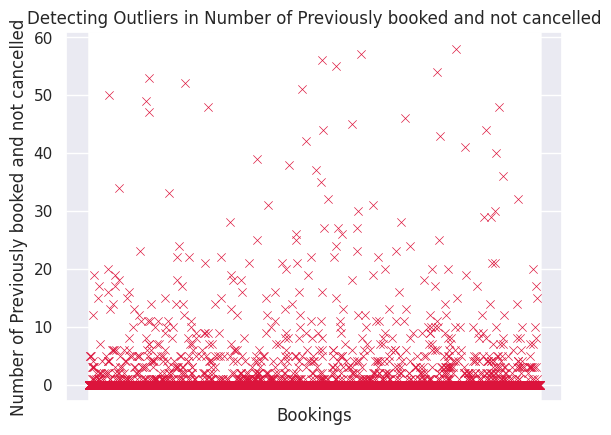

In [49]:
# Scatter plot for number of previously booked and not cancelled nights to see outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="P_not_C",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and not cancelled')
plt.title('Detecting Outliers in Number of Previously booked and not cancelled')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [50]:
# P-not-C outliers statistic values
get_outlier(df,'P_not_C')['P_not_C'].describe()

count    812.000000
mean       6.853448
std        9.573749
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       58.000000
Name: P_not_C, dtype: float64

In [51]:
# From the plot we can see after 30 data lessen. 
# Threshold determined as 30
# P-not-C outliers statistic values determined by the threshold
df.query('P_not_C > 30')['P_not_C'].describe()

count    32.000000
mean     43.781250
std       8.350138
min      31.000000
25%      36.750000
50%      44.000000
75%      50.250000
max      58.000000
Name: P_not_C, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='P_not_C', ylabel='Count'>

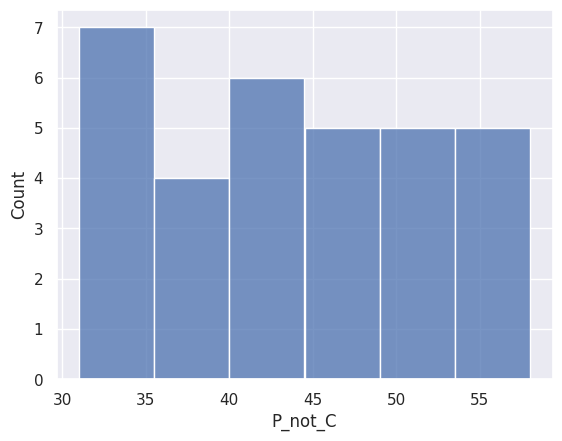

In [52]:
# Plotting outliers
sns.histplot(df.query('P_not_C > 30')['P_not_C'])

In [53]:
# Replace the outliers
replace_P_not_C_outlier_with_median_of_similar_rows(df,30)

'Outliers filled with similar rows median value'

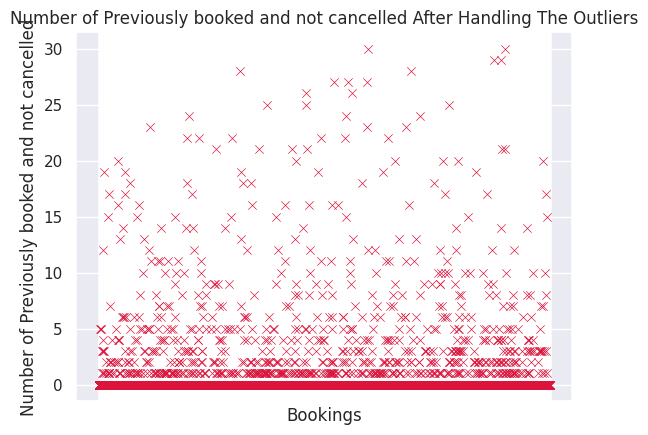

In [54]:
# Scatter plot for P-not-C to after handling outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="P_not_C",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and not cancelled')
plt.title('Number of Previously booked and not cancelled After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [55]:
# Creating New Feautures
# Reservation date day/month/year
df["reservation_day"] = df["date_of_reservation"].dt.day
df["reservation_month"] = df["date_of_reservation"].dt.month
df["reservation_year"] = df["date_of_reservation"].dt.year
# Arrival day to hotel
# Sum of date of reservation and lead time(day between reservation and arrival)
df['date_of_arrival'] = df['date_of_reservation'].combine(df['lead_time'], lambda x,y: x + pd.DateOffset(days=y))
# Arrival date day/month/year
df["arrival_day"] = df["date_of_arrival"].dt.day
df["arrival_month"] = df["date_of_arrival"].dt.month
df["arrival_year"] = df["date_of_arrival"].dt.year
# how many months between reservation and arrival
df["lead_month"] = np.floor(df["lead_time"]/30).astype('int')
#total staying nights
df["number_of_total_nights"] = df["number_of_weekend_nights"]+df['number_of_week_nights']
#total number of people that staying
df["number_of_total_people"] = df["number_of_children"]+df['number_of_adults']



In [56]:
df.groupby('arrival_year')['arrival_year'].count()

arrival_year
2016        1
2017     4701
2018    23117
2019     8463
2020        3
Name: arrival_year, dtype: int64

In [57]:
# the rows that arrival year 2016 and 2020 dropped 
df = df.drop(df.query('arrival_year == 2016 | arrival_year == 2020 | reservation_year == 2016' ).index)


## Data Visualization

In [58]:
# Data statistical values after pre-processing
df.describe()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,P_C,P_not_C,average_price,...,reservation_day,reservation_month,reservation_year,date_of_arrival,arrival_day,arrival_month,arrival_year,lead_month,number_of_total_nights,number_of_total_people
count,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,...,36280.000000,36280.000000,36280.000000,36280,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000,36280.000000
mean,1.844928,0.104520,0.807387,2.192558,0.030981,85.204631,0.025634,0.014333,0.116262,103.304300,...,15.595369,7.423319,2017.820397,2018-08-17 18:54:48.820286976,15.854741,6.812789,2018.103721,2.427012,2.999945,1.949449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2017.000000,2017-07-07 00:00:00,1.000000,1.000000,2017.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,...,8.000000,5.000000,2018.000000,2018-04-06 00:00:00,8.000000,3.000000,2018.000000,0.000000,2.000000,2.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,...,16.000000,8.000000,2018.000000,2018-08-26 00:00:00,16.000000,7.000000,2018.000000,1.000000,3.000000,2.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,...,23.000000,10.000000,2018.000000,2018-12-25 00:00:00,24.000000,10.000000,2018.000000,4.000000,4.000000,2.000000
max,4.000000,3.000000,5.000000,11.000000,1.000000,443.000000,1.000000,6.000000,30.000000,266.670000,...,31.000000,12.000000,2018.000000,2019-12-17 00:00:00,31.000000,12.000000,2019.000000,14.000000,16.000000,5.000000
std,0.518719,0.393715,0.861570,1.360295,0.173269,85.889460,0.158043,0.184321,1.159722,34.627003,...,8.738701,3.069824,0.383862,NaN,8.834966,3.637653,0.593354,2.821933,1.709279,0.645135


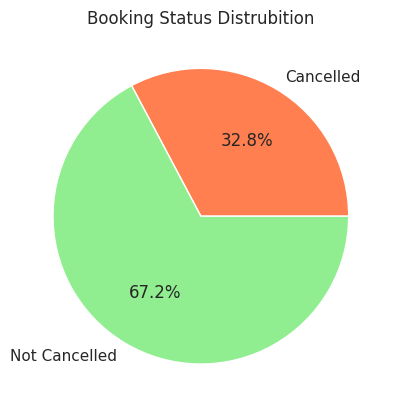

<Figure size 1200x800 with 0 Axes>

In [59]:
#Classes are imbalanced. Most of the data is classified not cancelled.
plt.pie(
        x=[
        df[df['booking_status'] == 'Canceled']['booking_status'].count(),
        df[df['booking_status'] == 'Not_Canceled']['booking_status'].count()],
        labels=['Cancelled', 'Not Cancelled'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen'],
)
plt.title('Booking Status Distrubition')
plt.figure(figsize=(12, 8))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

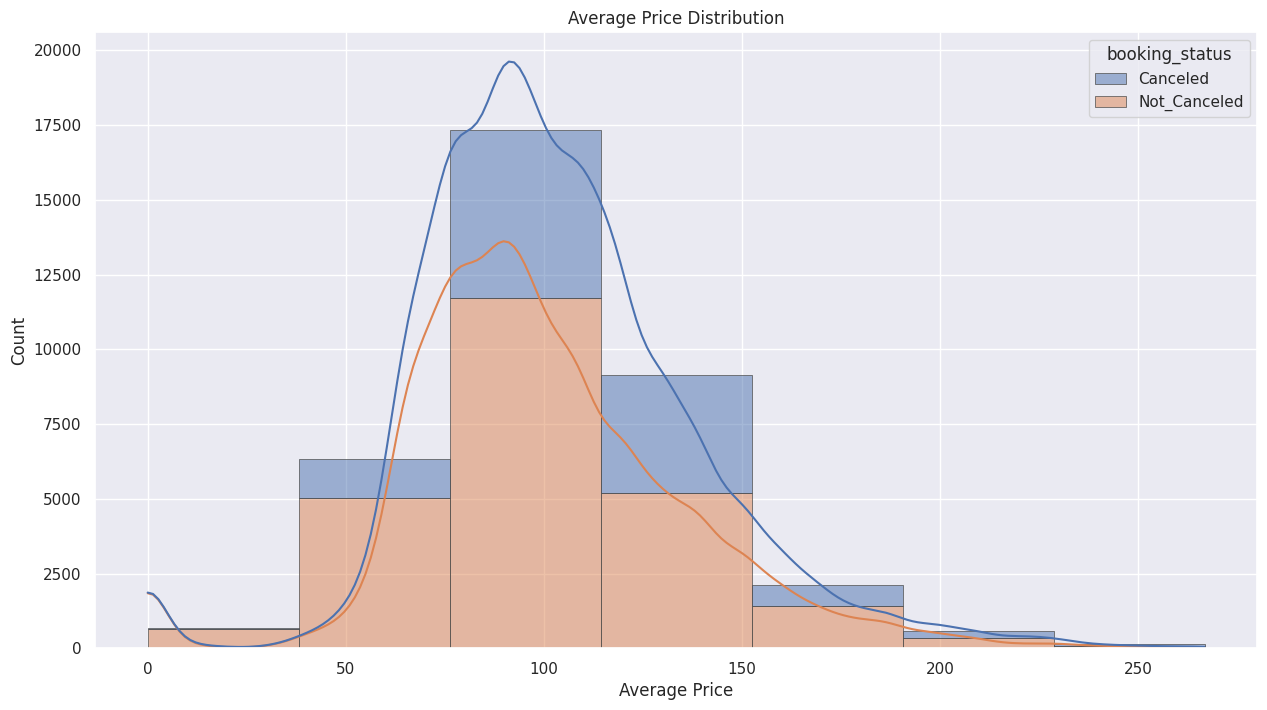

In [60]:
plot_hist(df,'Average Price Distribution', 'Average Price', 'average_price', 7, True, 'booking_status')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

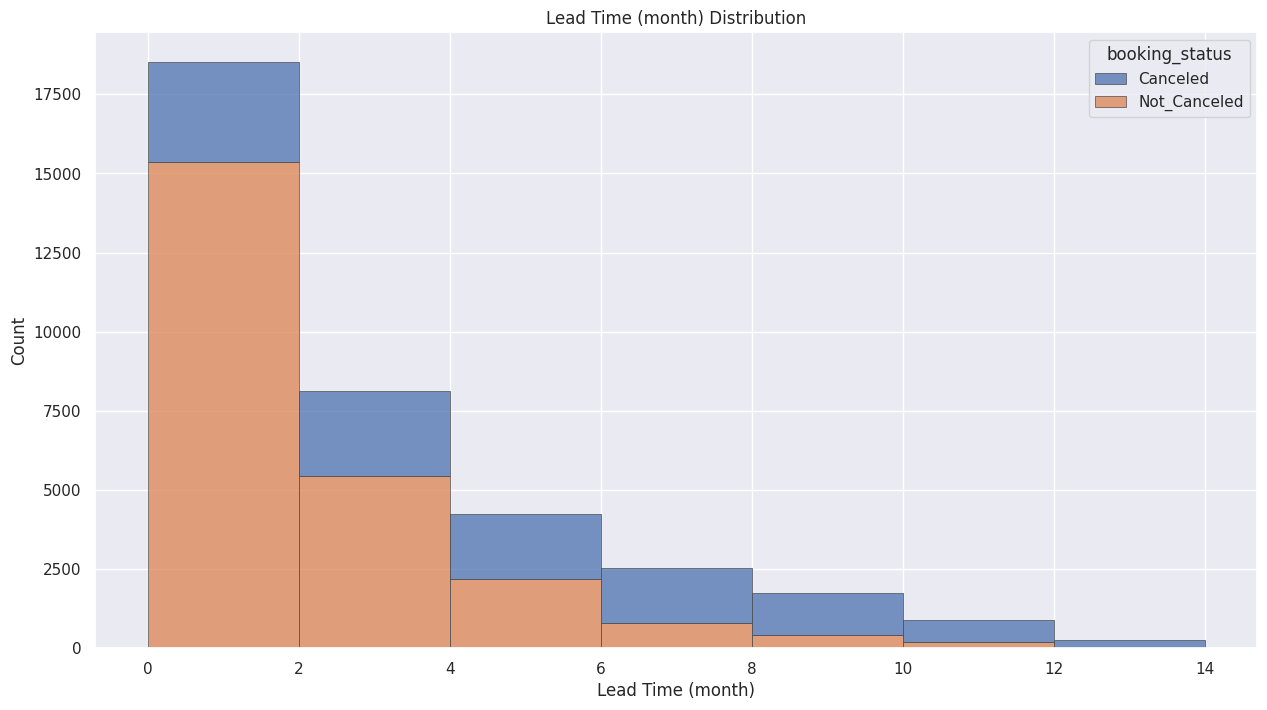

In [61]:
#Most of the time there are 0-2 months between reservation and arrival
#Bigger the time difference between reservation arrival date bigger rate of the cancelation
plot_hist(df,'Lead Time (month) Distribution', 'Lead Time (month)', 'lead_month', 7, False, 'booking_status' )

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default o

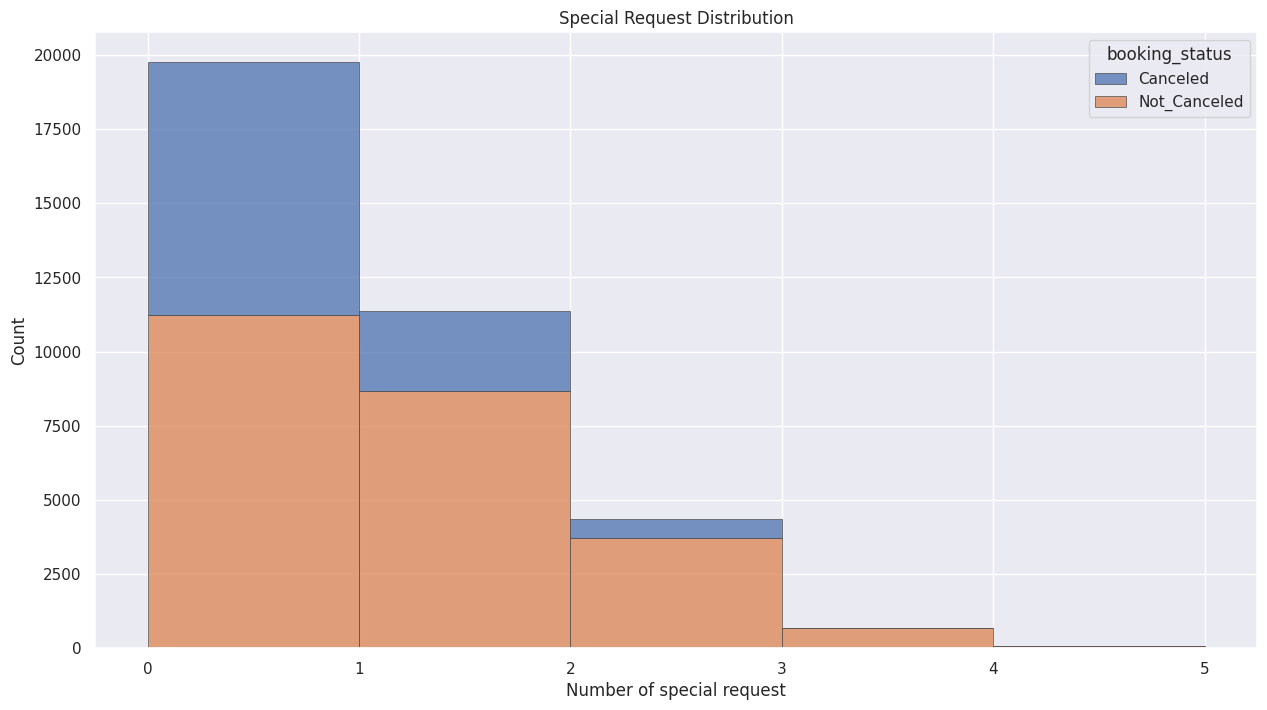

In [62]:
#Most of the time there are 0-2 special request
#More special request made lesser cancelation
plot_hist(df,'Special Request Distribution', 'Number of special request', 'special_requests', 5, False, 'booking_status' )

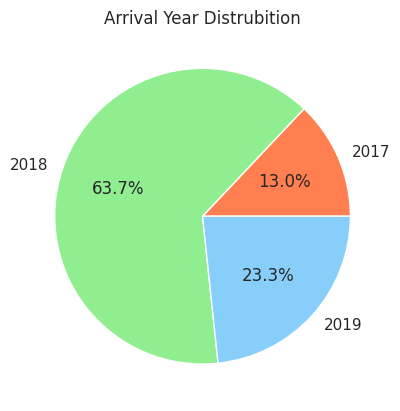

<Figure size 1200x800 with 0 Axes>

In [63]:
# Mostly arrival to the hotel is in 2018 but there are also 207 and 2019 data
plt.pie(
        x=[
        df.query('arrival_year == 2017')['arrival_year'].count(),
        df.query('arrival_year == 2018')['arrival_year'].count(),
        df.query('arrival_year == 2019')['arrival_year'].count(),
        ],
        labels=['2017', '2018','2019'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen', 'lightskyblue'],
)
plt.title('Arrival Year Distrubition')
plt.figure(figsize=(12, 8))
plt.show()

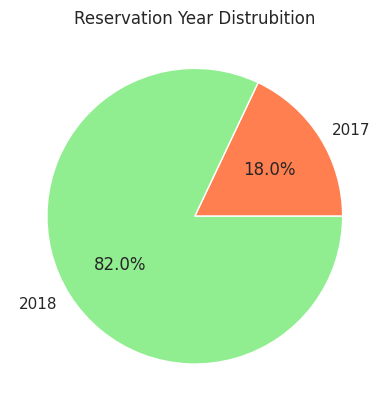

<Figure size 1200x800 with 0 Axes>

In [64]:
# Mostly reservation date is in 2018 
plt.pie(
        x=[
        df.query('reservation_year == 2017')['reservation_year'].count(),
        df.query('reservation_year == 2018')['reservation_year'].count(),
        ],
        labels=['2017', '2018'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen'],
)
plt.title('Reservation Year Distrubition')
plt.figure(figsize=(12, 8))
plt.show()

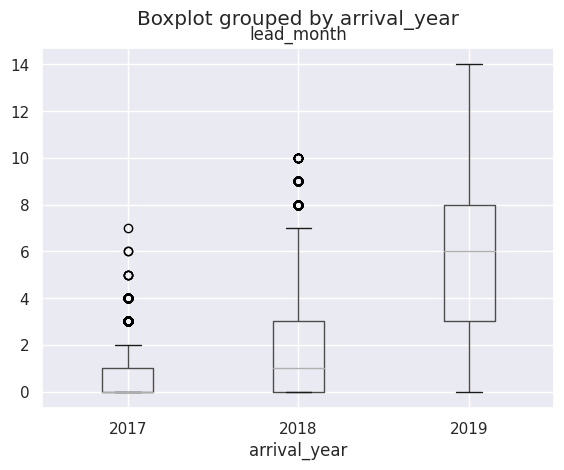

In [65]:
# Lead Month is bigger in 2019
df.boxplot(column='lead_month', by='arrival_year')
plt.show()

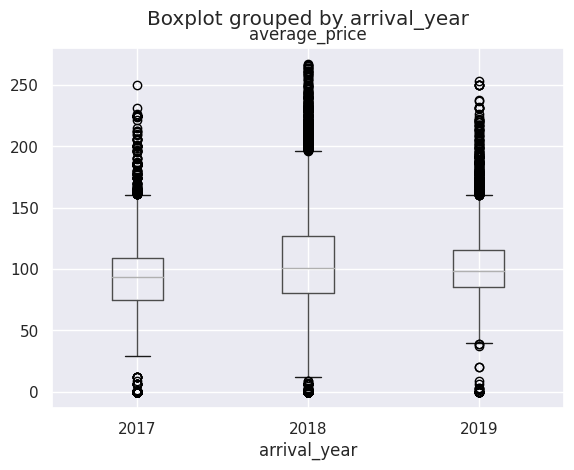

In [66]:
# Average Price range in years hasn't changed a lot
df.boxplot(column='average_price', by='arrival_year')
plt.show()

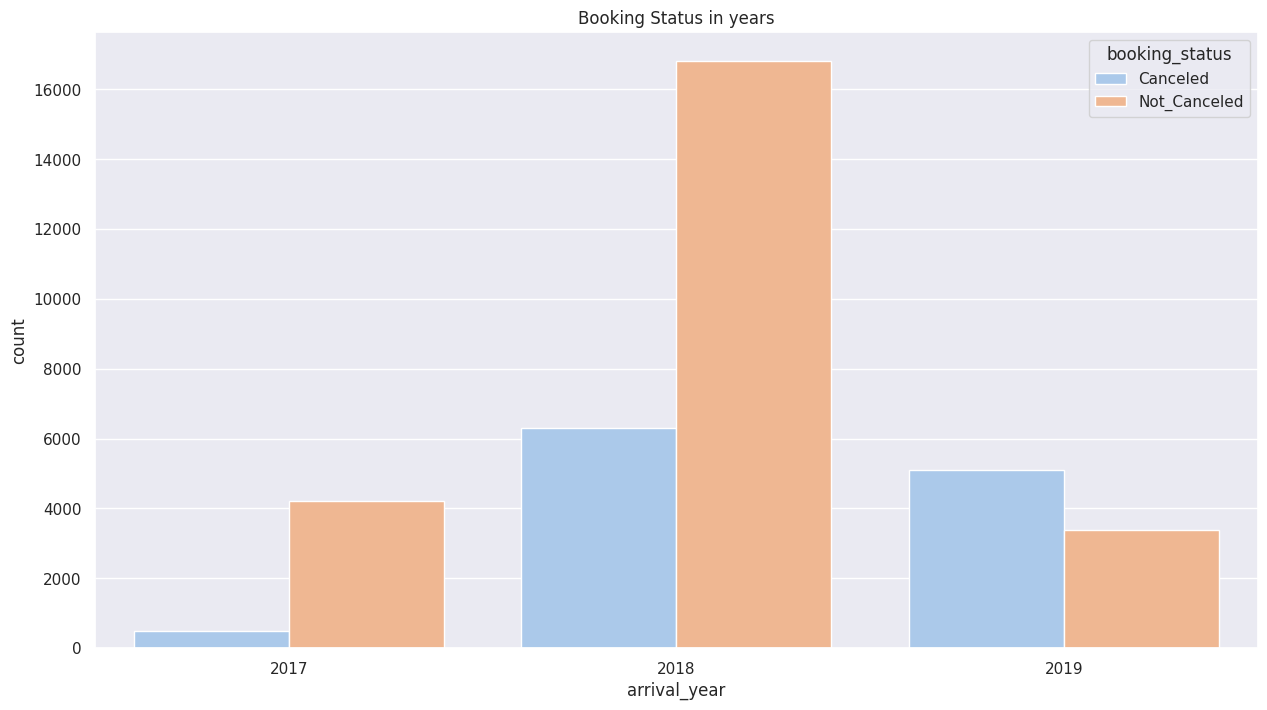

In [67]:
# In 2017 and 2018 Not Cancelled ratio bigger than Cancelled ratio but 2019 Canceled is more dominant
plot_count(df['arrival_year'],title ='Booking Status in years', xlabel='Years', hue=df['booking_status'],palette='pastel')

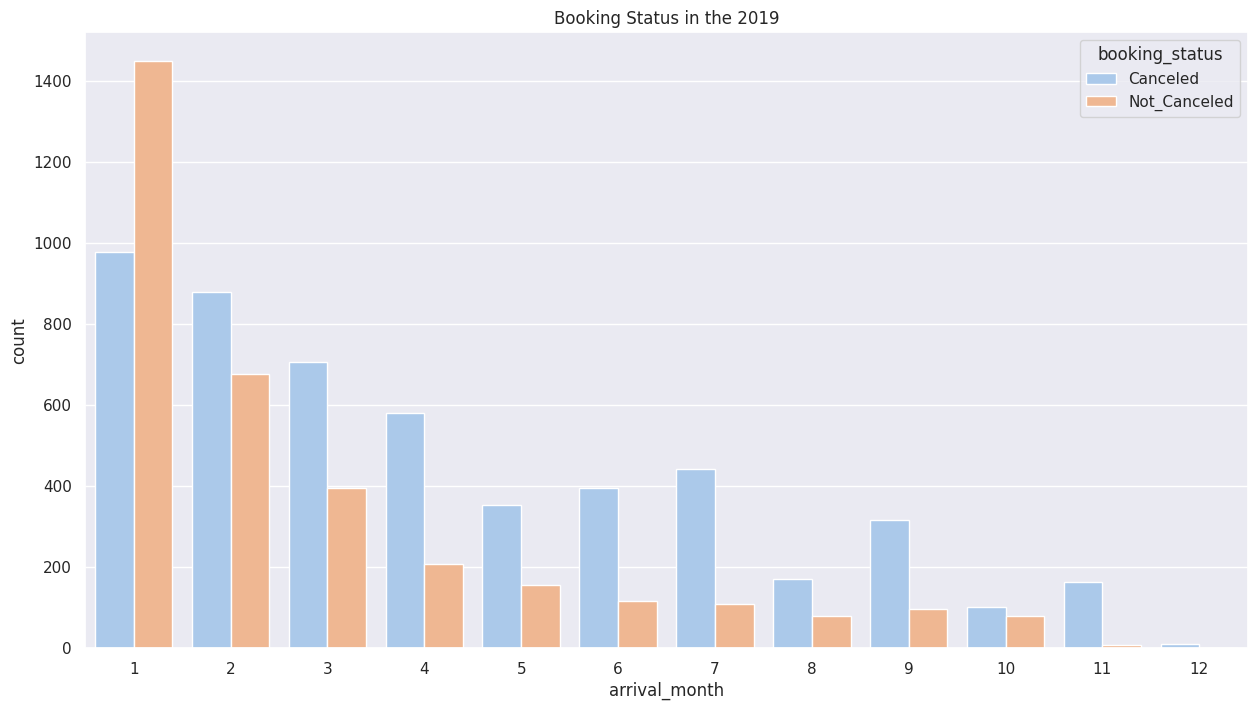

In [68]:
# In 2019 there are more cancelations except January
plot_count(df.query('arrival_year == 2019')['arrival_month'],title ='Booking Status in the 2019', xlabel='Months', hue=df.query('arrival_year == 2019')['booking_status'],palette='pastel')

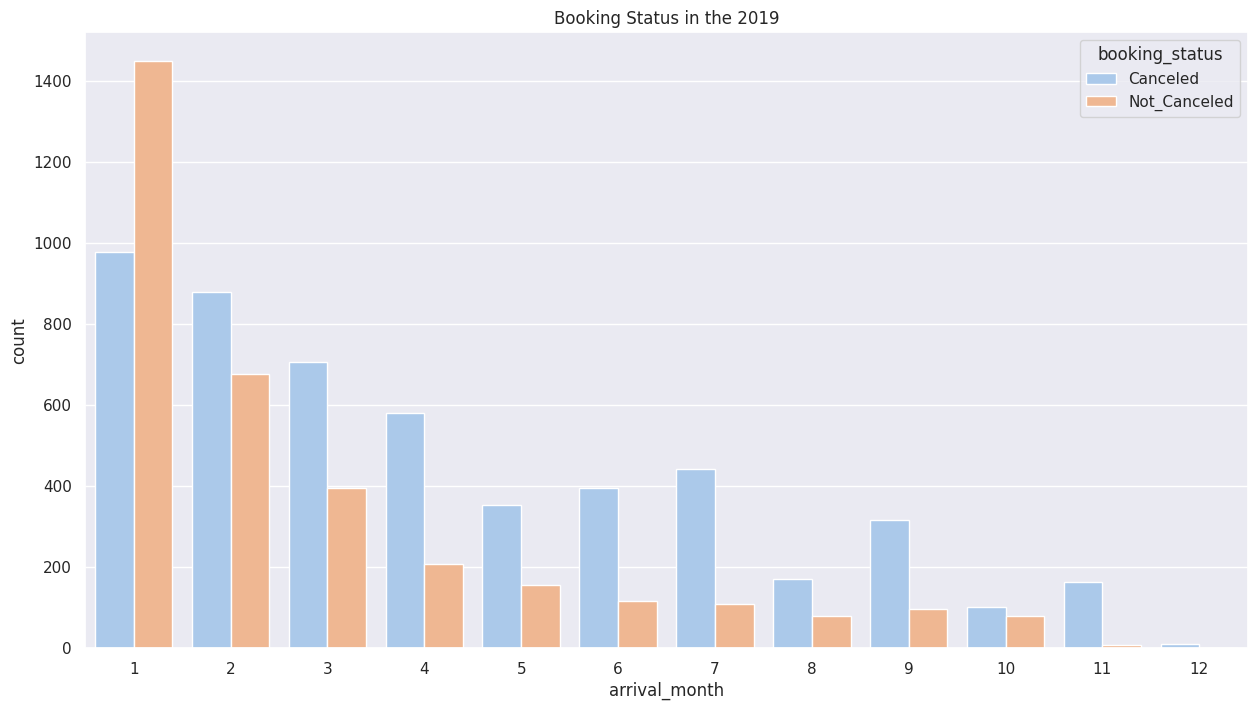

In [69]:
# In 2019 there are more cancelations except January
plot_count(df.query('arrival_year == 2019')['arrival_month'],title ='Booking Status in the 2019', xlabel='Months', hue=df.query('arrival_year == 2019')['booking_status'],palette='pastel')

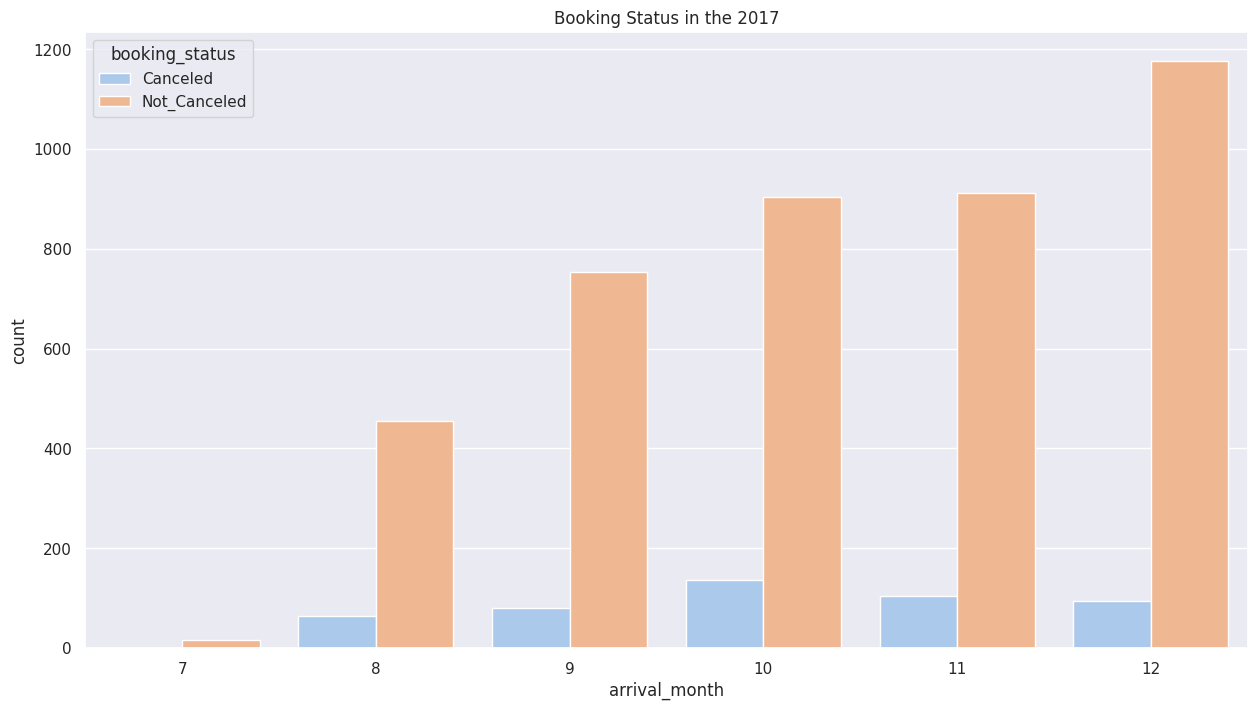

In [70]:
plot_count(df.query('arrival_year == 2017')['arrival_month'],title ='Booking Status in the 2017', xlabel='Months', hue=df.query('arrival_year == 2017')['booking_status'],palette='pastel')

In [71]:
# Changing type of arrival and reservation year to str
# For showing in line plot
df['arrival_year'] = df['arrival_year'].astype(str)
df['reservation_year'] = df['reservation_year'].astype(str)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

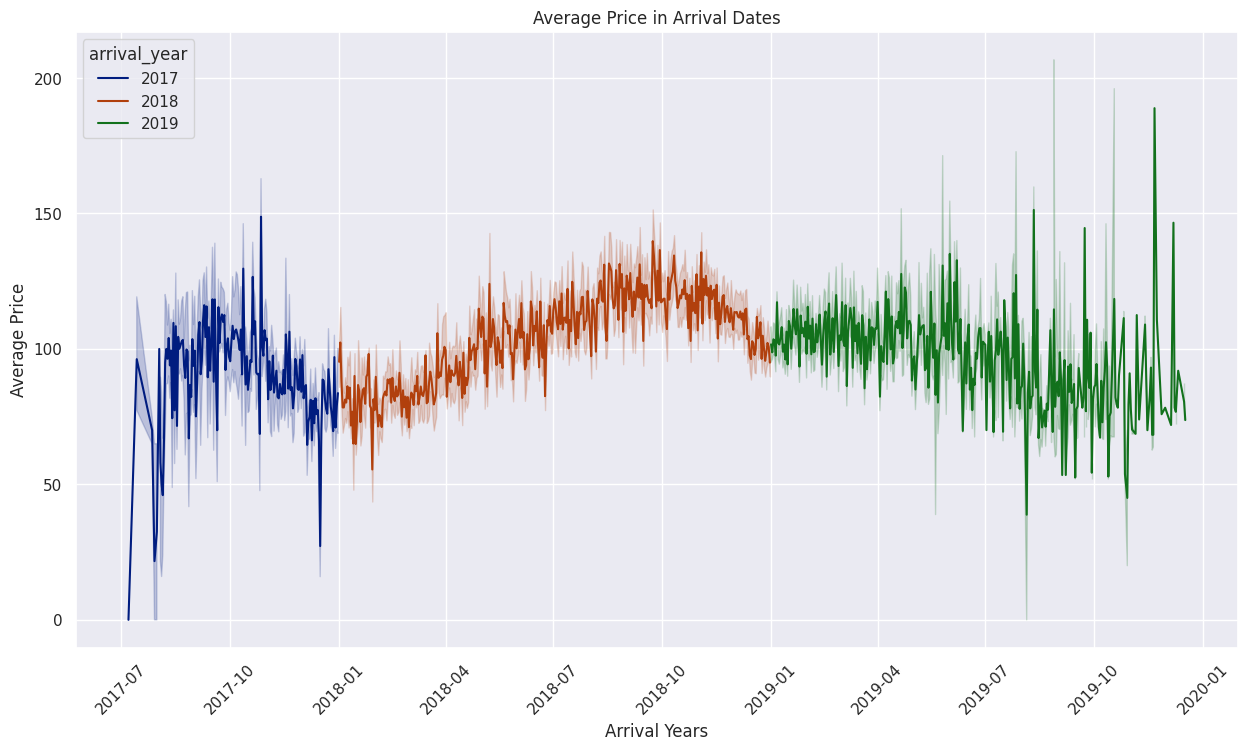

In [72]:
plt.figure(figsize=(15,8))
plt.title('Average Price in Arrival Dates')
plt.ylabel('Average Price')
plt.xlabel('Arrival Years')
plt.xticks(rotation=45)
sns.lineplot(data=df, x="date_of_arrival", y="average_price",
             hue='arrival_year',palette='dark',
             hue_order=['2017','2018','2019'] 
)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

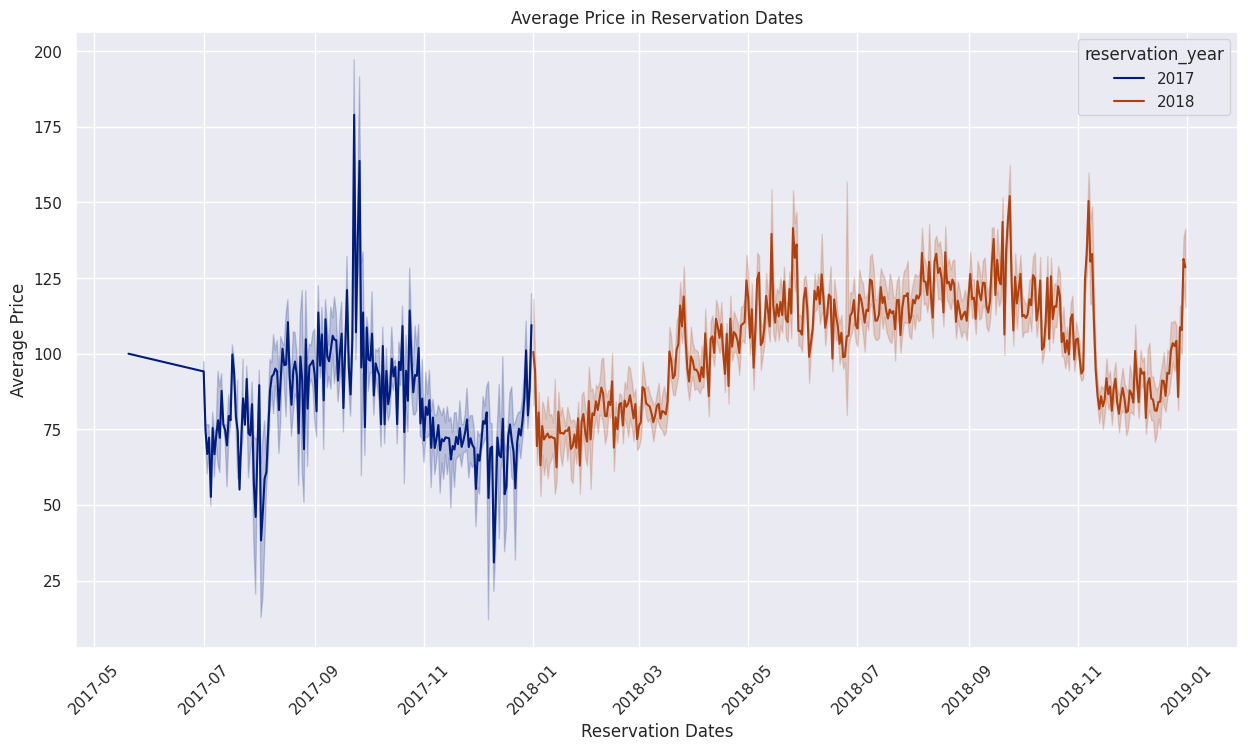

In [73]:
plt.figure(figsize=(15,8))
plt.title('Average Price in Reservation Dates')
plt.ylabel('Average Price')
plt.xlabel('Reservation Dates')
plt.xticks(rotation=45)
sns.lineplot(data=df, x="date_of_reservation", y="average_price",
             hue='reservation_year',palette='dark',
             hue_order=['2017','2018'] 
)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='date_of_arrival', ylabel='lead_time'>

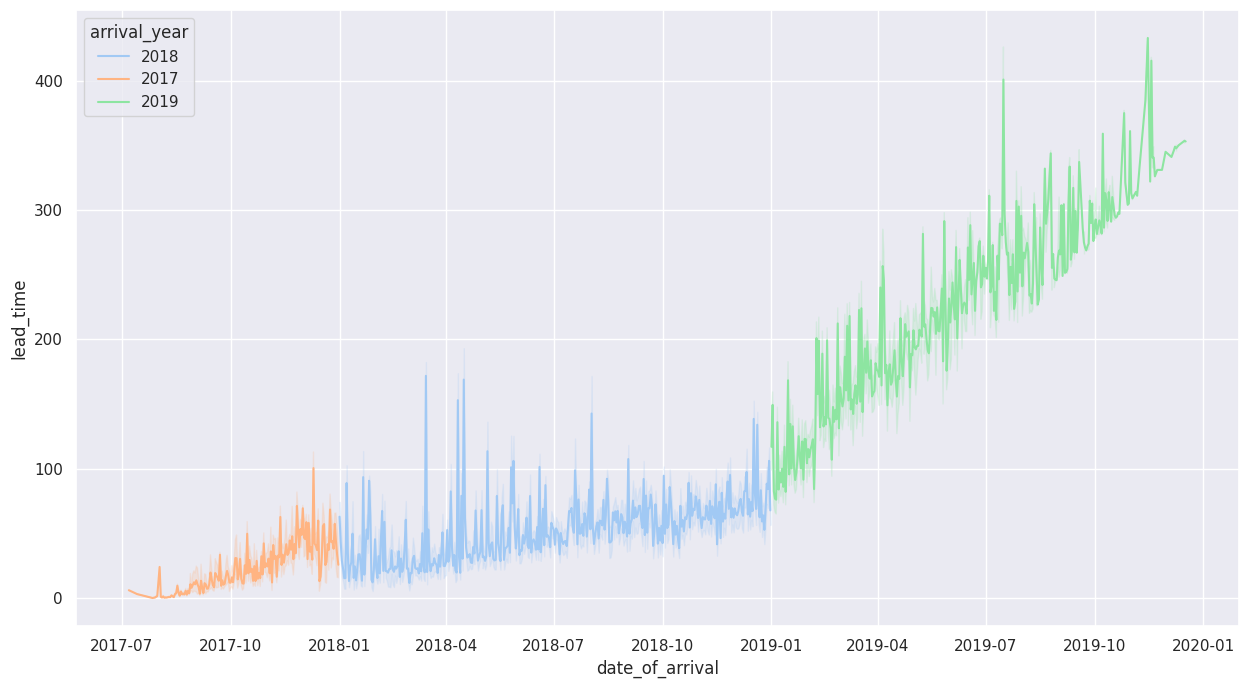

In [74]:
# There is a big increase in lead time in the bookings that have arrival date of 2019
# Because of lead time increased cancelation in 2019 is bigger than other years
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="date_of_arrival", y="lead_time",hue='arrival_year',palette='pastel')

### Encode Categorical Variables
- booking status
- type of meal
- room type
- market_segment_type 

In [75]:
df['booking_status'] = encode_categorical_variable(df['booking_status'])
df['room_type'] = encode_categorical_variable(df['room_type'])
df['market_segment_type'] = encode_categorical_variable(df['market_segment_type'])
df['type_of_meal'] = encode_categorical_variable(df['type_of_meal'])

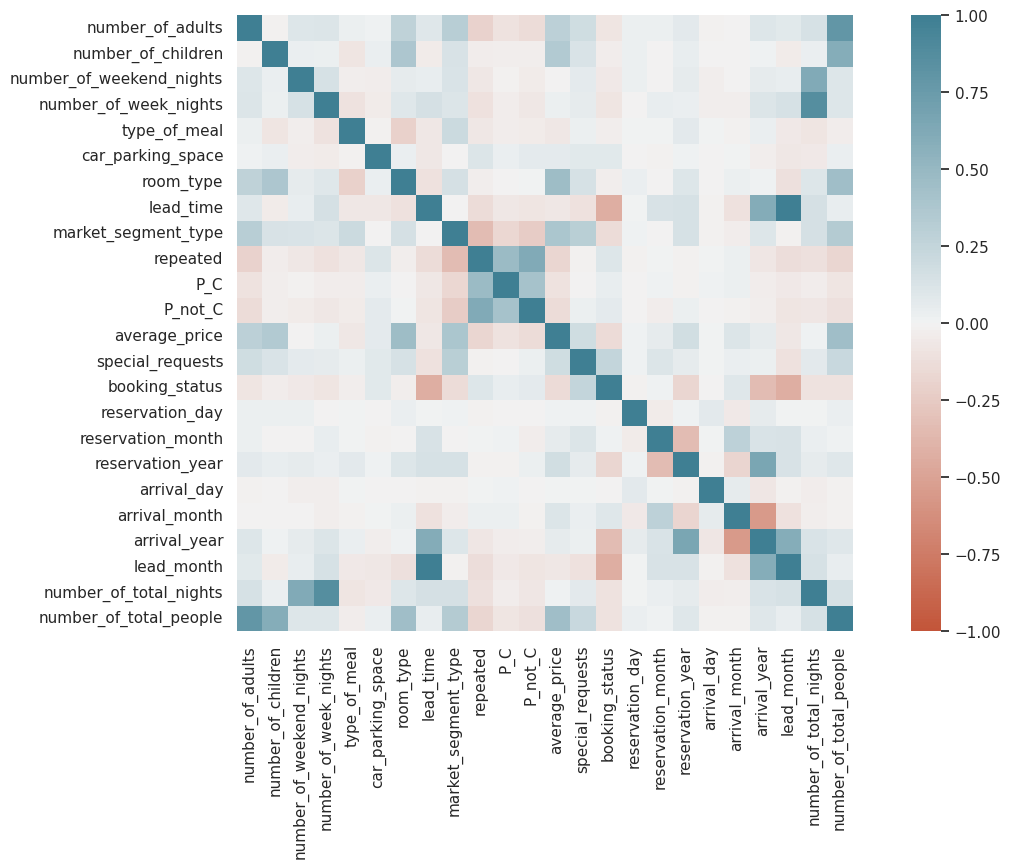

In [76]:
# lead time , market segment type, average price, special request,
#reservation year, arrival year and lead month has a correlation with booking status
#There is not a strong corelation with other variables except the obvious ones.
corr_heatmap(df.drop(['Booking_ID','date_of_reservation','date_of_arrival'], axis=1))

### Normalization

In [77]:
# Normalize the data
df_normalized = normalize_data(df,['Booking_ID','date_of_reservation','date_of_arrival','booking_status'])
X = df_normalized
y = df['booking_status']

### Feauture Selection

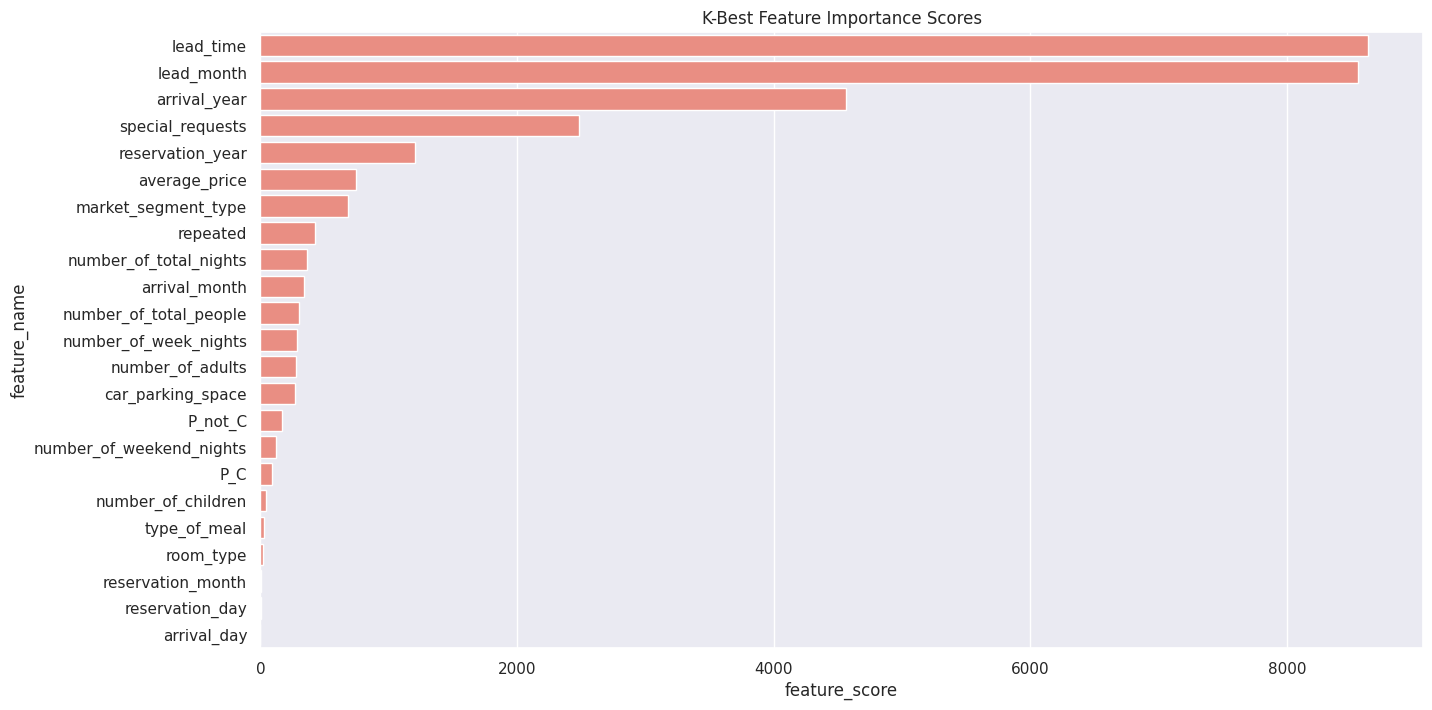

k-best features: Index(['lead_time', 'market_segment_type', 'repeated', 'average_price',
       'special_requests', 'reservation_year', 'arrival_year', 'lead_month'],
      dtype='object')


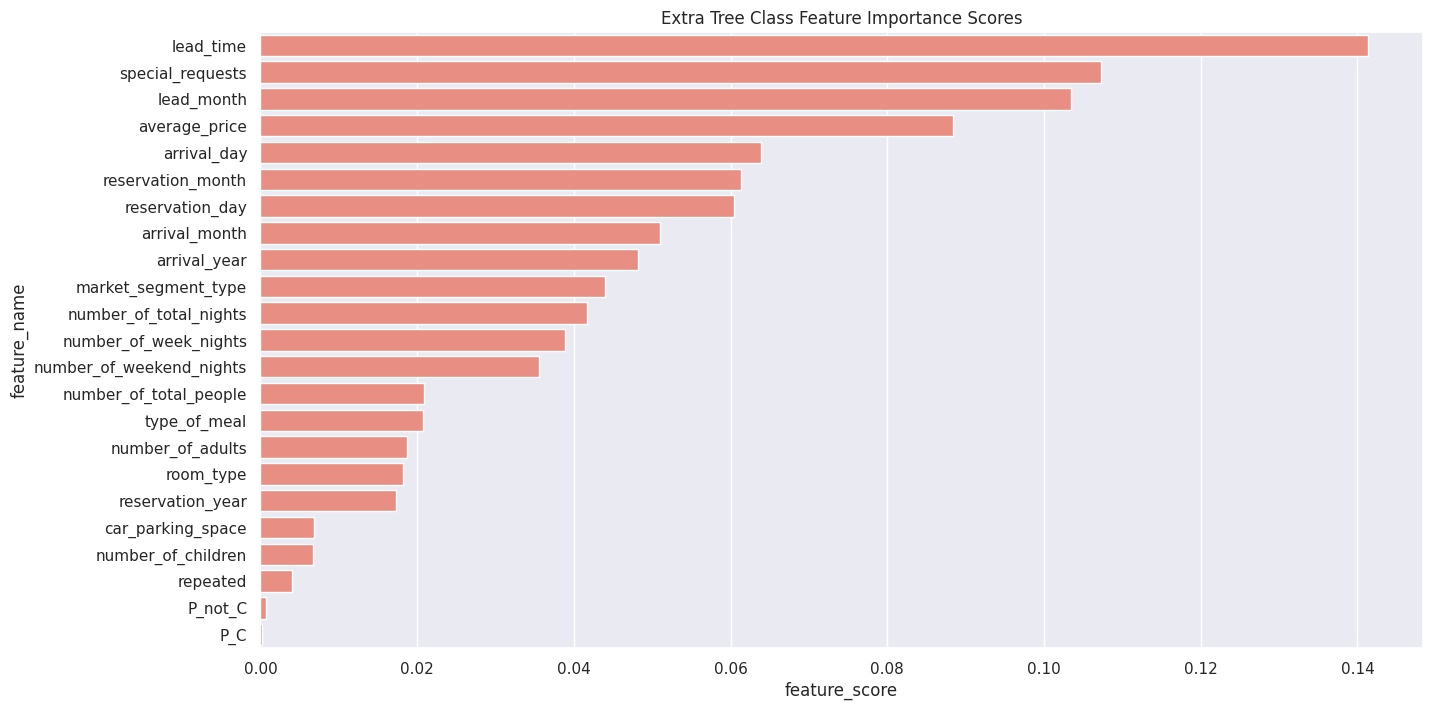

Extra Tree classifier features: Index(['lead_time', 'special_requests', 'lead_month', 'average_price',
       'arrival_day', 'reservation_month', 'reservation_day', 'arrival_month'],
      dtype='object')


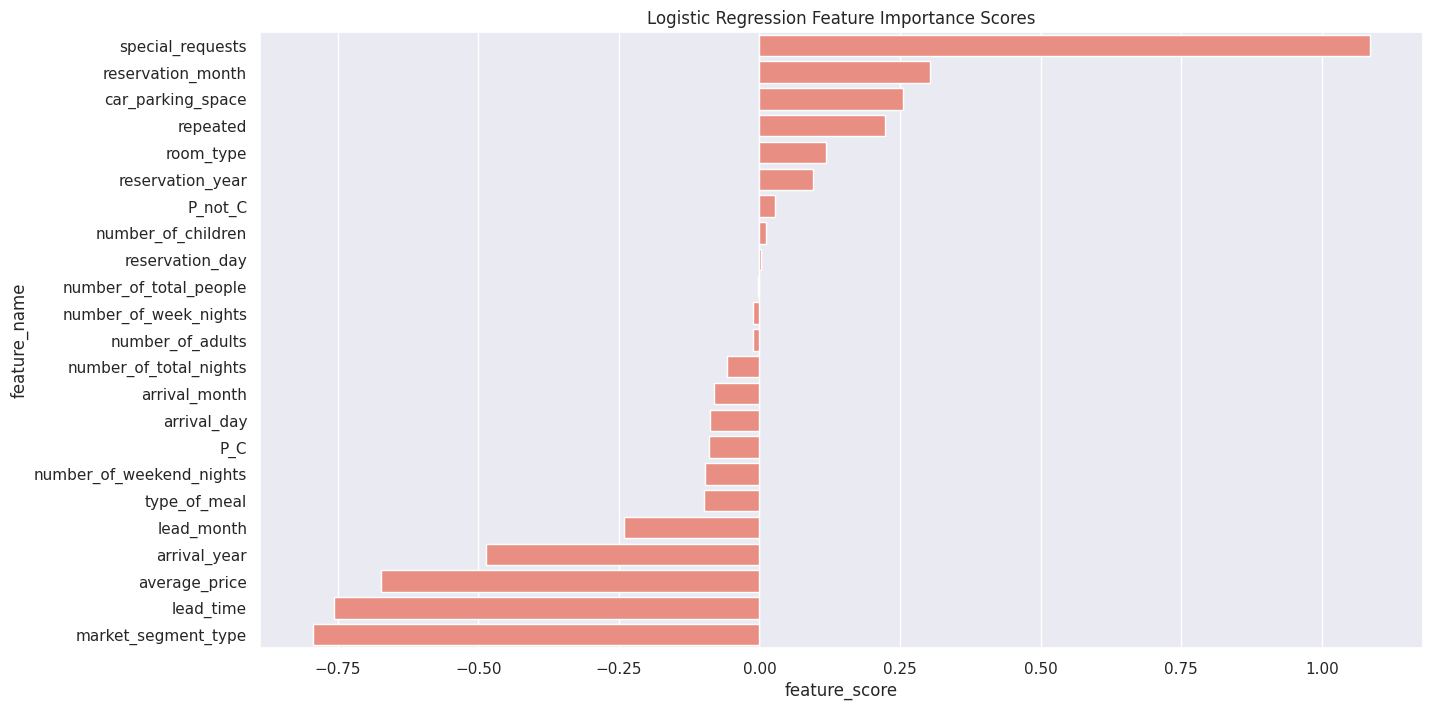

Logistic Regression features: Index(['special_requests', 'average_price', 'lead_time',
       'market_segment_type'],
      dtype='object')


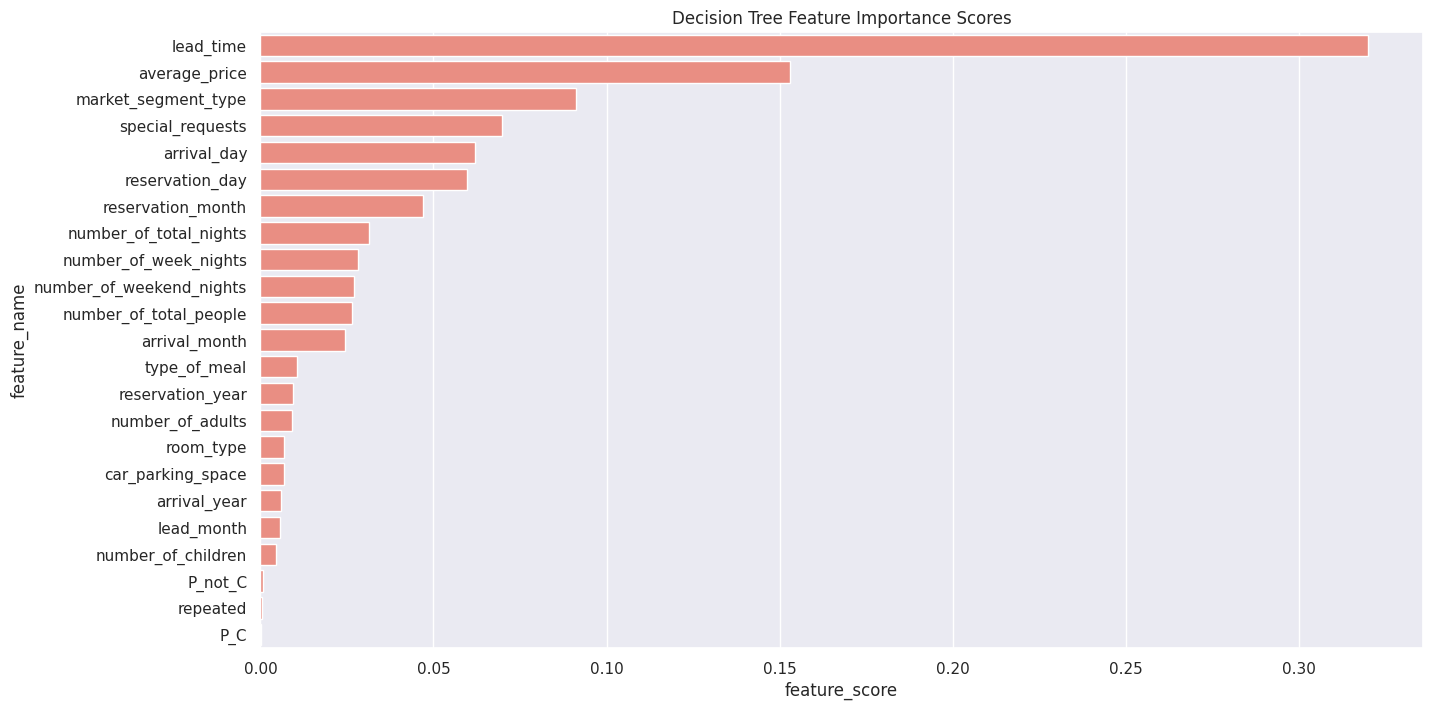

Decision Tree features: Index(['lead_time', 'average_price', 'market_segment_type', 'special_requests',
       'arrival_day', 'reservation_day'],
      dtype='object')


In [78]:
df_feauture_k_best_score, df_feautures_k_best = feauture_selection_select_k_best(df_normalized,8,X,y)
plot_bar(df_feauture_k_best_score,'feature_score', 'feature_name','K-Best Feature Importance Scores', 'Feauture Score', 'Feature Name',color='salmon',orient='h')
print("k-best features:", df_feautures_k_best.columns)
df_extra_tree_class_feature_score,df_feautures_extra_tree_class = feature_selection_extra_trees_classifier(df_normalized,X,y)
plot_bar(df_extra_tree_class_feature_score,'feature_score', 'feature_name','Extra Tree Class Feature Importance Scores', 'Feauture Score', 'Feature Name',color='salmon',orient='h')
print("Extra Tree classifier features:", df_feautures_extra_tree_class.columns)
df_logistic_feature_score, df_feautures_logistic = feauture_selection_logistic_regression(df_normalized,X,y)
plot_bar(df_logistic_feature_score,'feature_score', 'feature_name','Logistic Regression Feature Importance Scores', 'Feauture Score', 'Feature Name',color='salmon',orient='h')
print("Logistic Regression features:", df_feautures_logistic.columns)
df_dt_feature_score,df_feautures_dt = feature_selection_dt(df_normalized,X,y)
plot_bar(df_dt_feature_score,'feature_score', 'feature_name','Decision Tree Feature Importance Scores', 'Feauture Score', 'Feature Name',color='salmon',orient='h')
print("Decision Tree features:", df_feautures_dt.columns)


## Modelling

Logistic Regression Model confusion matrix, without normalization
[[1424 1010]
 [ 483 4339]]
Logistic Regression Model normalized confusion matrix
[[0.58504519 0.41495481]
 [0.10016591 0.89983409]]


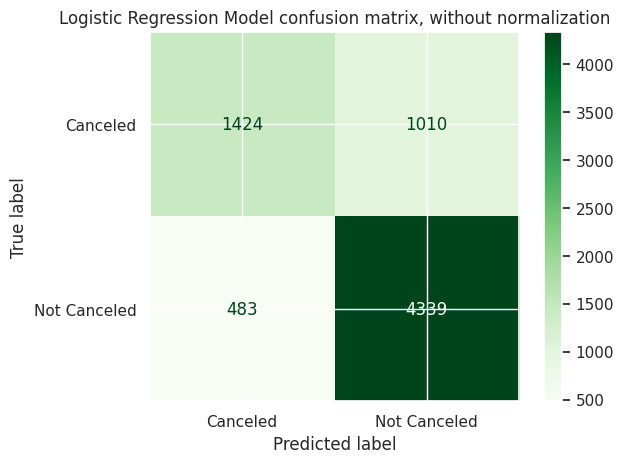

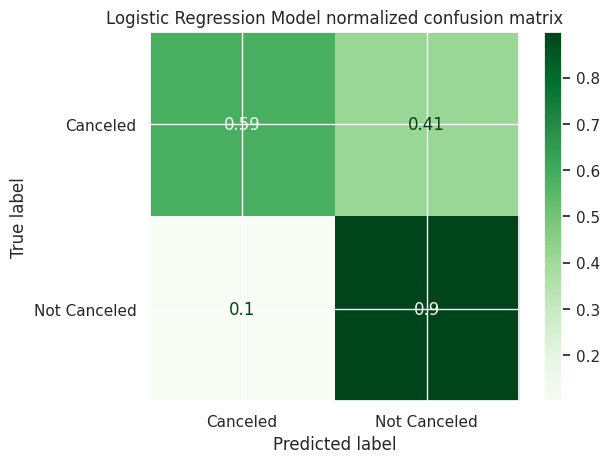

Logistic Regression Model normalized confusion matrix
              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2434
           1       0.81      0.90      0.85      4822

    accuracy                           0.79      7256
   macro avg       0.78      0.74      0.75      7256
weighted avg       0.79      0.79      0.79      7256



In [79]:
# Training and Evulating the models
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split( df_feautures_logistic, df['booking_status'], test_size=0.2, random_state=10)
logreg = LogisticRegression()
y_pred = train_model_and_predict(logreg,X_train,y_train,X_test)
evaluate_model(logreg,X_test,y_test, y_pred,'Logistic Regression Model')


K Nearest Neighbour Classifier confusion matrix, without normalization
[[1794  640]
 [ 492 4330]]
K Nearest Neighbour Classifier normalized confusion matrix
[[0.73705834 0.26294166]
 [0.10203235 0.89796765]]


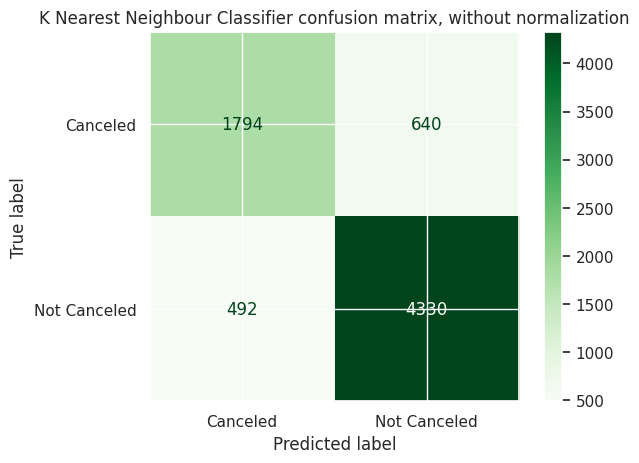

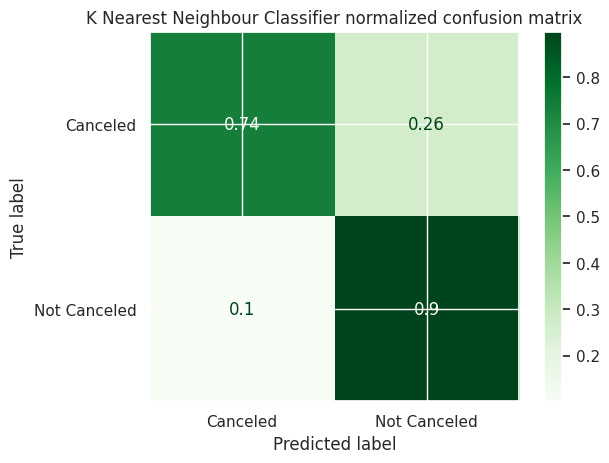

K Nearest Neighbour Classifier normalized confusion matrix
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2434
           1       0.87      0.90      0.88      4822

    accuracy                           0.84      7256
   macro avg       0.83      0.82      0.82      7256
weighted avg       0.84      0.84      0.84      7256



In [80]:
#KNN
X_train, X_test, y_train, y_test = train_test_split( df_feautures_extra_tree_class, df['booking_status'], test_size=0.2, random_state=10)
knn = KNeighborsClassifier(n_neighbors=3)
y_pred = train_model_and_predict(knn,X_train,y_train,X_test)
evaluate_model(knn,X_test,y_test, y_pred, 'K Nearest Neighbour Classifier')


Decision Tree Classifier confusion matrix, without normalization
[[1874  560]
 [ 577 4245]]
Decision Tree Classifier normalized confusion matrix
[[0.76992605 0.23007395]
 [0.11965989 0.88034011]]


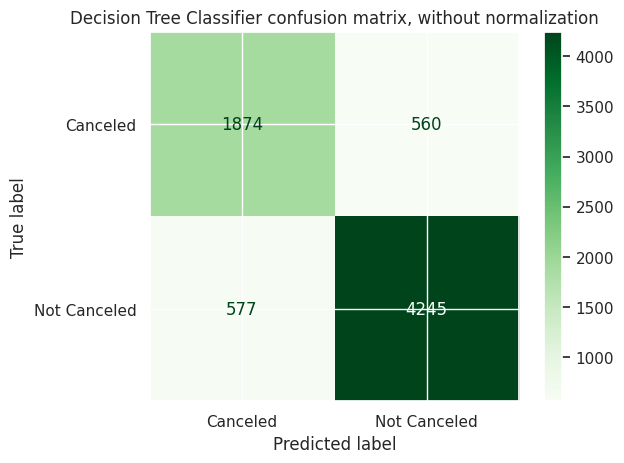

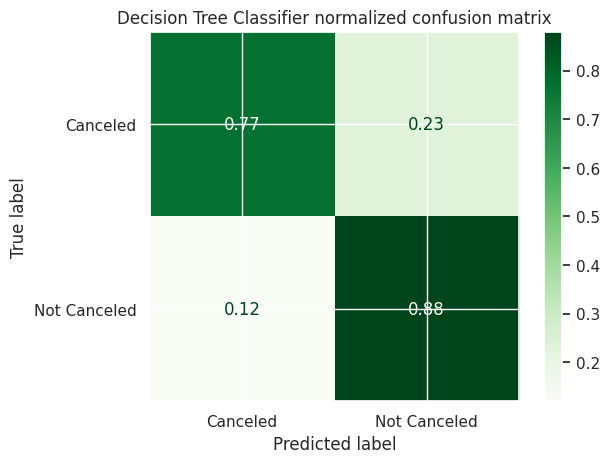

Decision Tree Classifier normalized confusion matrix
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2434
           1       0.88      0.88      0.88      4822

    accuracy                           0.84      7256
   macro avg       0.82      0.83      0.82      7256
weighted avg       0.84      0.84      0.84      7256



In [81]:
# Decision Tree
X_train, X_test, y_train, y_test = train_test_split( df_feautures_dt, df['booking_status'], test_size=0.2, random_state=10)
classifier = DecisionTreeClassifier()
y_pred = train_model_and_predict(classifier,X_train,y_train,X_test)
evaluate_model(classifier,X_test,y_test, y_pred, 'Decision Tree Classifier')


Support Vector Classifier(SVC) confusion matrix, without normalization
[[1209 1225]
 [ 413 4409]]
Support Vector Classifier(SVC) normalized confusion matrix
[[0.49671323 0.50328677]
 [0.08564911 0.91435089]]


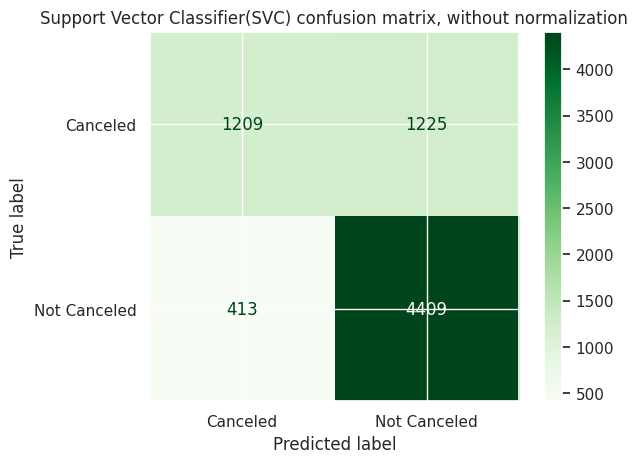

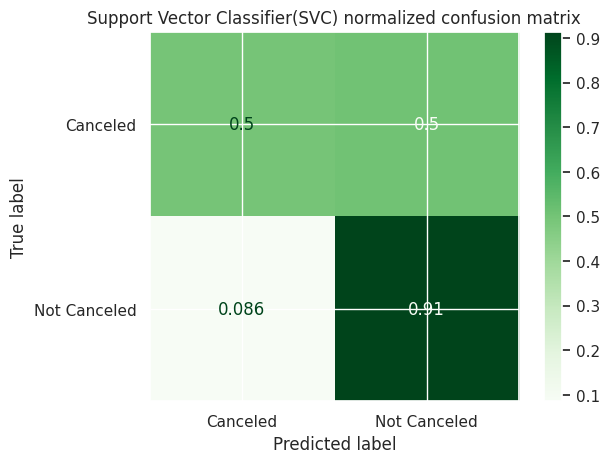

Support Vector Classifier(SVC) normalized confusion matrix
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      2434
           1       0.78      0.91      0.84      4822

    accuracy                           0.77      7256
   macro avg       0.76      0.71      0.72      7256
weighted avg       0.77      0.77      0.76      7256



In [82]:
#SVM
X_train, X_test, y_train, y_test = train_test_split( df_feautures_extra_tree_class, df['booking_status'], test_size=0.2, random_state=10)
model = svm.SVC(kernel='linear')            
y_pred = train_model_and_predict(model,X_train,y_train,X_test)
evaluate_model(model,X_test,y_test, y_pred, 'Support Vector Classifier(SVC)')